<a href="https://colab.research.google.com/github/carloscl03/PruebasRL1/blob/main/REINFORCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Paso 1: Espacio del problema
def inicializar_entorno():
    """
    Inicializa el entorno con las condiciones iniciales.
    """
    estado_inicial = 0  # x inicial
    objetivo = 30       # x objetivo
    return estado_inicial, objetivo

def transicion_estado(estado_actual, accion):
    """
    Calcula el nuevo estado después de realizar una acción.
    Incluye el error aleatorio de ±1.
    """
    import random
    error = random.choice([-1, 0, 1])  # Error aleatorio
    nuevo_estado = estado_actual + accion + error
    return nuevo_estado

def calcular_recompensa(estado, objetivo):
    if estado > objetivo:
        return -(estado - 30)**2  # Penalización por pasarse
    elif estado == objetivo:
        return  15 # Recompensa al alcanzar el objetivo
    else:
        return 0  # Sin recompensa si no llega


In [60]:
import numpy as np

def politica(theta, estado):
    """
    Define la política del agente: toma un estado y parámetros,
    y devuelve una distribución de probabilidad sobre las acciones disponibles.
    """
    acciones_disponibles = [3, 7]

    fun = np.exp(theta[0])/ (np.exp(theta[0]) + np.exp(theta[1] * estado / 30))
    probabilidades = np.array([fun, 1 - fun])
    #print(f"Probabilidades: {probabilidades}")
    # Evitar valores extremos
    probabilidades = np.clip(probabilidades, 1e-8, 1 - 1e-8)
    #print(f"Probabilidades clip: {probabilidades}")
    return acciones_disponibles, probabilidades


def seleccionar_accion(acciones, probabilidades):
    """
    Selecciona una acción según la política.
    """
    accion = np.random.choice(acciones, p=probabilidades)
    return accion

In [53]:
# Paso 3: Algoritmo REINFORCE
def calcular_retorno(recompensas, gamma=0.99):
    """
    Calcula los retornos acumulados a partir de las recompensas.
    """
    G = 0
    retornos = []
    for r in reversed(recompensas):
        G = r + gamma * G
        retornos.insert(0, G)
    return retornos

def actualizar_theta(theta, estados, acciones, retornos, alpha=0.01):
    """
    Actualiza los parámetros theta según la regla de gradiente de política.
    """
    for estado, accion, G_t in zip(estados, acciones, retornos):
        _, probabilidades = politica(theta, estado)
        indice_accion = [3, 7].index(accion)
        grad_log_pi = np.array([theta[0] - probabilidades[indice_accion], (theta[1] - probabilidades[indice_accion])* estado/30])
        theta += alpha * grad_log_pi * G_t
    return theta

In [5]:
# Paso 4: Visualización
import matplotlib.pyplot as plt

def mostrar(historia):
    """
    Grafica el progreso del agente: posición (x) vs tiempo (t).
    """
    tiempos = list(range(len(historia)))
    posiciones = historia
    plt.figure(figsize=(10, 6))
    plt.plot(tiempos, posiciones, marker='o', linestyle='-')
    plt.title("Progreso del agente: Posición vs Tiempo")
    plt.xlabel("Tiempo discreto (t)")
    plt.ylabel("Posición (x)")
    plt.grid(True)
    plt.show()


In [6]:
# Paso 5: Ciclo de entrenamiento
def entrenar(episodios=1000):
    estado_inicial, objetivo = inicializar_entorno()
    theta = np.random.rand(2)  # Inicialización aleatoria de parámetros
    historia = []

    for episodio in range(episodios):
        estado = estado_inicial
        estados = []
        acciones = []
        recompensas = []

        while estado != objetivo and len(historia) < 100:  # Máximo 100 pasos por episodio
            acciones_disponibles, probabilidades = politica(theta, estado)
            accion = seleccionar_accion(acciones_disponibles, probabilidades)

            nuevo_estado = transicion_estado(estado, accion)
            recompensa = calcular_recompensa(nuevo_estado, objetivo)

            estados.append(estado)
            acciones.append(accion)
            recompensas.append(recompensa)

            estado = nuevo_estado
            historia.append(estado)

        retornos = calcular_retorno(recompensas)
        theta = actualizar_theta(theta, estados, acciones, retornos)

    mostrar(historia)


In [7]:
def visualizar_politica(theta):
    """
    Visualiza la política del agente graficando las probabilidades para cada acción
    en función de los estados posibles.
    """
    estados = np.arange(0, 35, 1)  # Estados de 0 a 34
    probabilidades_3 = []
    probabilidades_7 = []

    # Calcular probabilidades para cada estado
    for estado in estados:
        _, probabilidades = politica(theta, estado)
        probabilidades_3.append(probabilidades[0])  # Probabilidad de acción 3
        probabilidades_7.append(probabilidades[1])  # Probabilidad de acción 7

    # Graficar probabilidades
    plt.figure(figsize=(8, 6))
    plt.plot(estados, probabilidades_3, label="Acción: 3 pasos", marker='o', linestyle='--')
    plt.plot(estados, probabilidades_7, label="Acción: 7 pasos", marker='s', linestyle='-')
    plt.xlabel("Estado")
    plt.ylabel("Probabilidad")
    plt.ylim(0, 1)  # Limitar el eje y de 0 a 1
    plt.legend()
    plt.title("Distribución de Probabilidades de la Política")
    plt.grid(True)  # Añadir una cuadrícula para mejor visualización
    plt.show()


In [8]:
# Probar el espacio del problema
estado_inicial, objetivo = inicializar_entorno()

print(f"Estado inicial: {estado_inicial}, Objetivo: {objetivo}")

# Probar una acción
accion = 5
nuevo_estado = transicion_estado(estado_inicial, accion)
print(f"Nuevo estado después de la acción {accion}: {nuevo_estado}")

# Probar recompensa
recompensa = calcular_recompensa(nuevo_estado, objetivo)
print(f"Recompensa para el estado {nuevo_estado}: {recompensa}")

Estado inicial: 0, Objetivo: 30
Nuevo estado después de la acción 5: 5
Recompensa para el estado 5: 0


In [9]:
# Probar la política del agente
estado = 10
theta = np.array([0.1, -0.5])  # Par de parámetros iniciales

acciones, probabilidades = politica(theta, estado)
print(f"Estado: {estado}, Acciones: {acciones}, Probabilidades: {probabilidades}")

# Seleccionar una acción
accion_seleccionada = seleccionar_accion(acciones, probabilidades)
print(f"Acción seleccionada: {accion_seleccionada}")


Probabilidades: [0.56627439 0.43372561]
Probabilidades clip: [0.56627439 0.43372561]
Estado: 10, Acciones: [3, 7], Probabilidades: [0.56627439 0.43372561]
Acción seleccionada: 7


In [10]:
# Probar el cálculo de retornos
recompensas = [1, -0.5, -0.2, 0.8]  # Recompensas ficticias de un episodio
gamma = 0.99

retornos = calcular_retorno(recompensas, gamma)
print(f"Recompensas: {recompensas}")
print(f"Retornos: {retornos}")

Recompensas: [1, -0.5, -0.2, 0.8]
Retornos: [1.0852192, 0.08608000000000005, 0.5920000000000001, 0.8]


In [11]:
# Probar la actualización de theta
estados = [0, 5, 10]
acciones = [3, 7, 3]
retornos = [1.5, 0.8, -0.2]  # Retornos ficticios
alpha = 0.01
theta_inicial = np.random.rand(2)

print(f"Parámetros iniciales: {theta_inicial}")
theta_actualizado = actualizar_theta(theta_inicial, estados, acciones, retornos, alpha)
print(f"Parámetros actualizados: {theta_actualizado}")

Parámetros iniciales: [0.82947345 0.41364163]
Probabilidades: [0.69624358 0.30375642]
Probabilidades clip: [0.69624358 0.30375642]
Probabilidades: [0.68190312 0.31809688]
Probabilidades clip: [0.68190312 0.31809688]
Probabilidades: [0.66739454 0.33260546]
Probabilidades clip: [0.66739454 0.33260546]
Parámetros actualizados: [0.83524253 0.42246205]


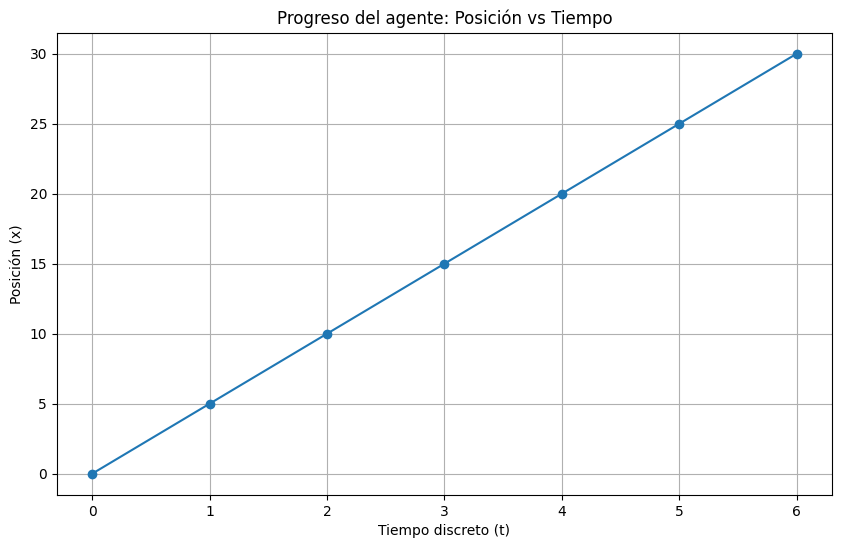

In [12]:
# Generar datos ficticios para graficar
historia = [0, 5, 10, 15, 20, 25, 30]  # Trayectoria ficticia del agente
mostrar(historia)


In [13]:
# Probar la nueva función de recompensa
objetivo = 30
estados_prueba = [25, 30, 35]

for estado in estados_prueba:
    recompensa = calcular_recompensa(estado, objetivo)
    print(f"Estado: {estado}, Recompensa: {recompensa}")

Estado: 25, Recompensa: 0
Estado: 30, Recompensa: 10
Estado: 35, Recompensa: -10


Historia de estados: [3, 7, 9, 17, 24, 32, 38, 42, 50, 58]
Recompensas obtenidas: [0, 0, 0, 0, 0, -10, -10, -10, -10, -10]
Retornos acumulados: [-46.607974891195504, -47.07876251635909, -47.55430557207989, -48.03465209300999, -48.51985059899999, -49.00995009999999, -39.40398999999999, -29.700999999999997, -19.9, -10.0]


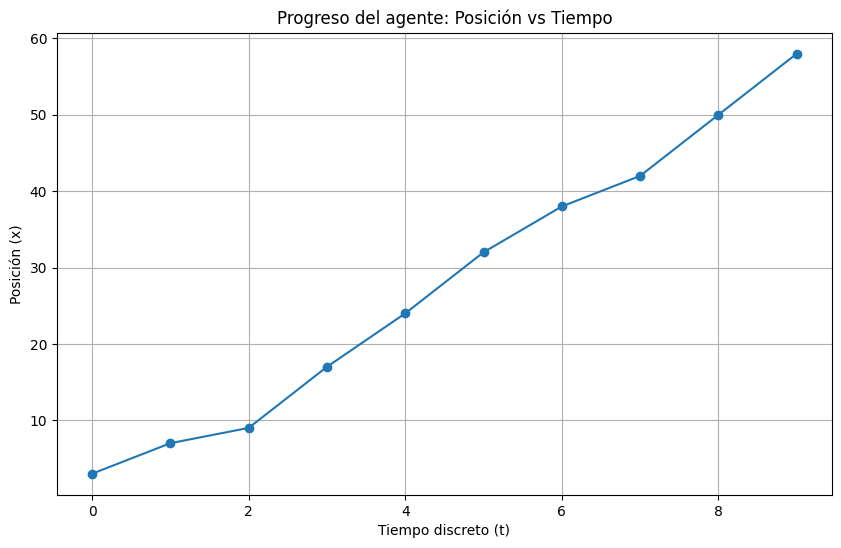

In [51]:
# Simular un episodio y calcular retornos acumulados
gamma = 0.99  # Factor de descuento
estado_inicial, objetivo = inicializar_entorno()
estado = estado_inicial
historia = []
recompensas = []

for t in range(10):  # Limitar el episodio a 10 pasos
    acciones, probabilidades = politica([0.1, -0.2], estado)
    accion = seleccionar_accion(acciones, probabilidades)
    nuevo_estado = transicion_estado(estado, accion)
    recompensa = calcular_recompensa(nuevo_estado, objetivo)

    historia.append(nuevo_estado)
    recompensas.append(recompensa)

    if nuevo_estado == objetivo:
        print(f"Objetivo alcanzado en el tiempo {t}!")
        break

    estado = nuevo_estado

# Calcular retornos acumulados
retornos = calcular_retorno(recompensas, gamma)
print(f"Historia de estados: {historia}")
print(f"Recompensas obtenidas: {recompensas}")
print(f"Retornos acumulados: {retornos}")
mostrar(historia)

Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Episodio 0: Parámetros theta = [-0.113068    0.30997918]


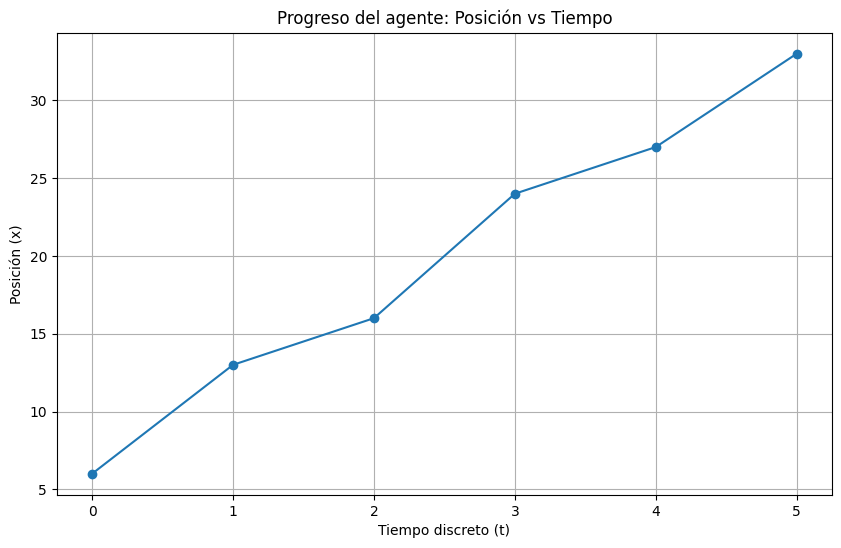

Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -

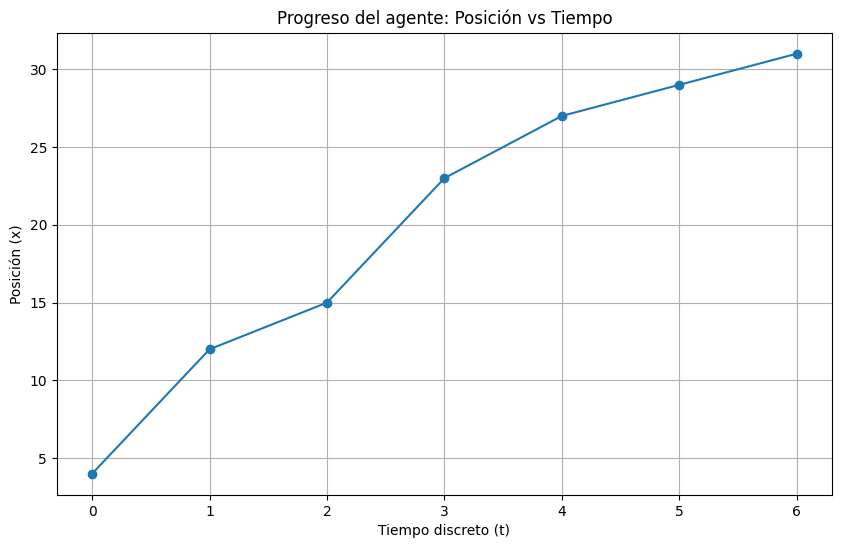

Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [1.0833062044631037, 1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.6048980806860795, -2.22902511206399

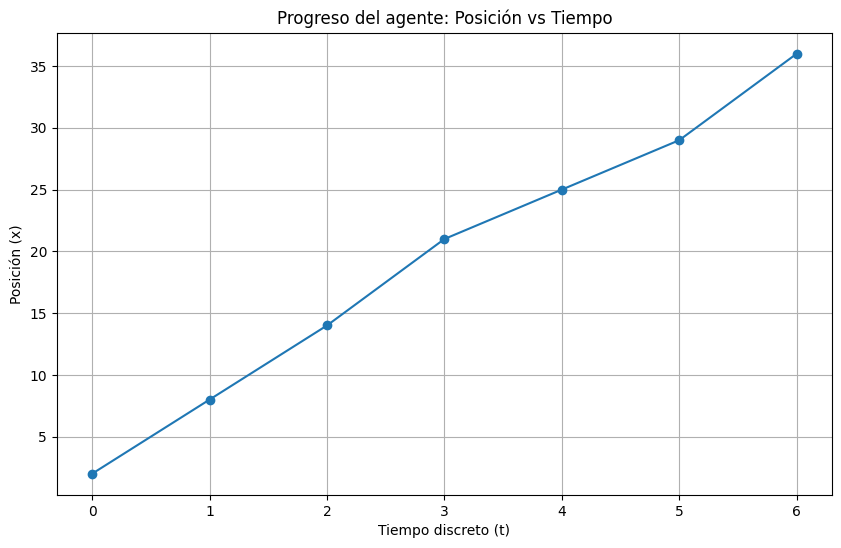

Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.05199869781422897, -0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -

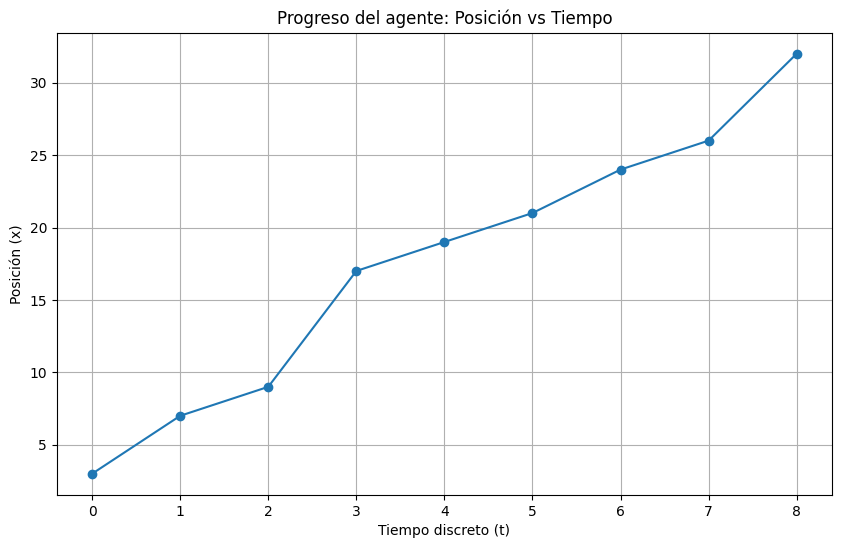

Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4

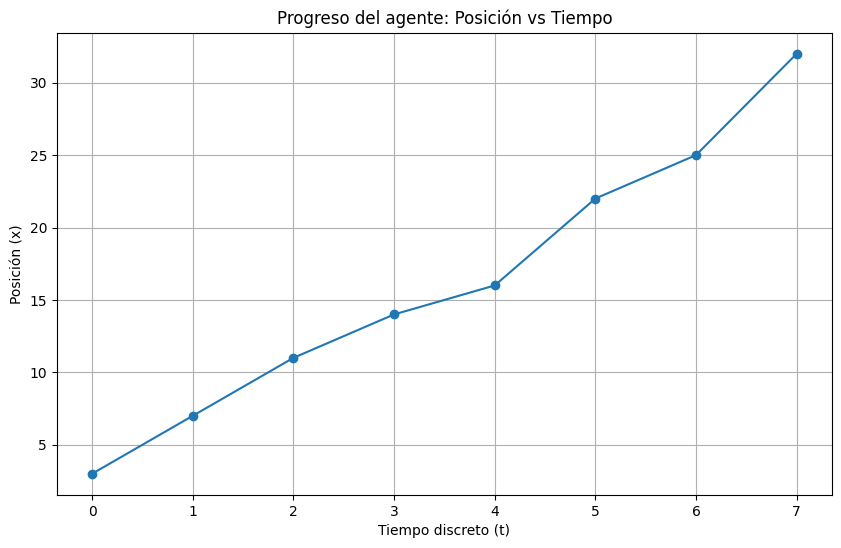

Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-4.8372940799

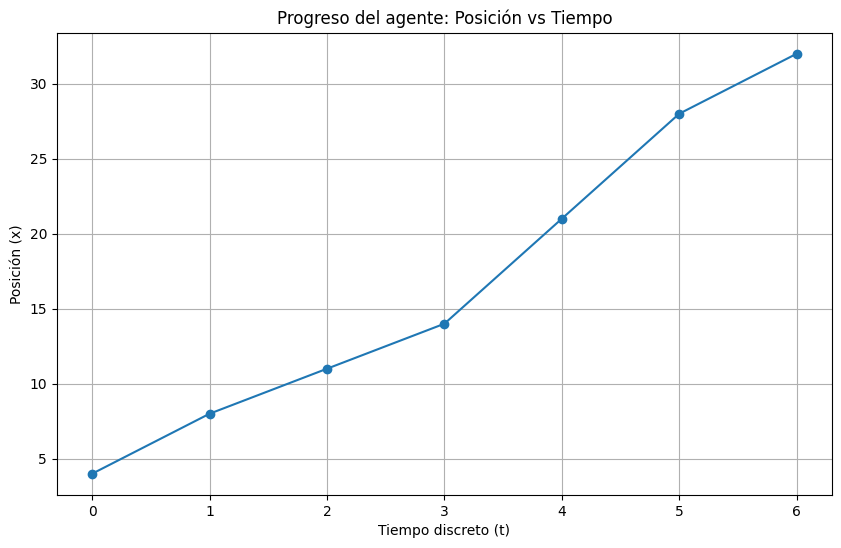

Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.9027551703859198, -1.2538266255359998,

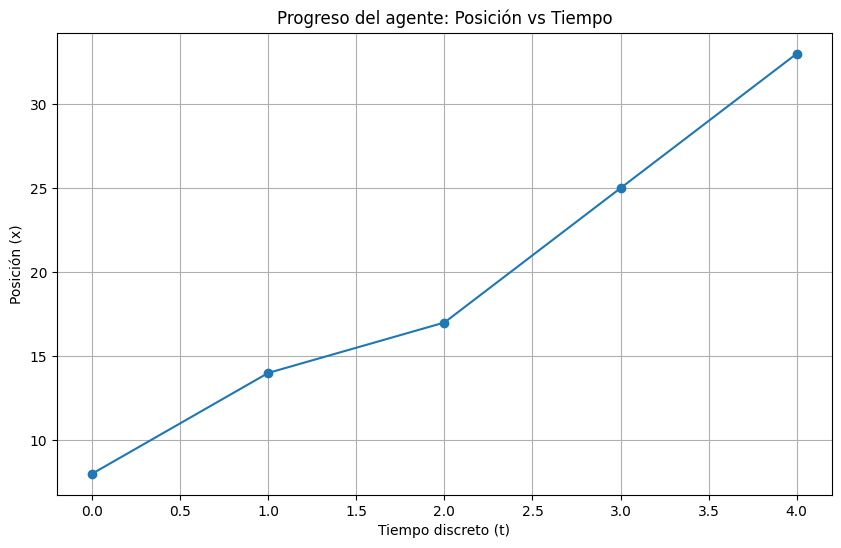

Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [1.0833062044631037, 1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos

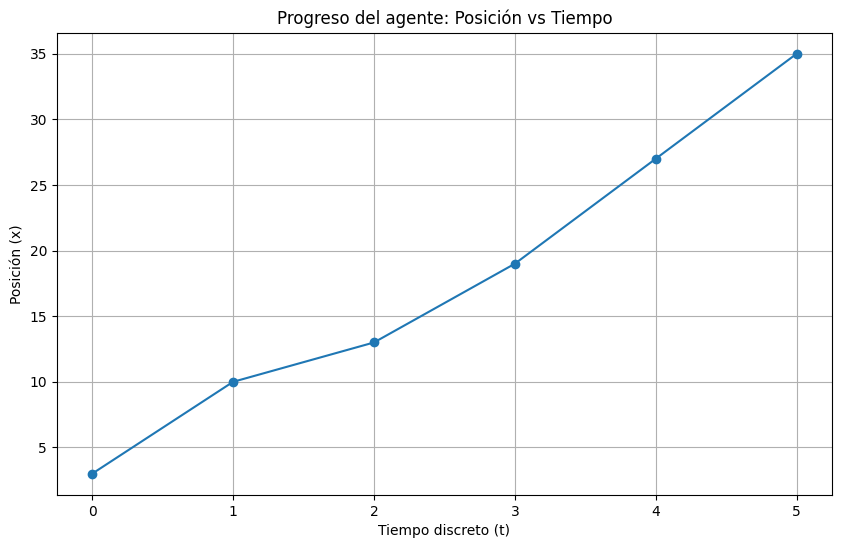

Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.5987199

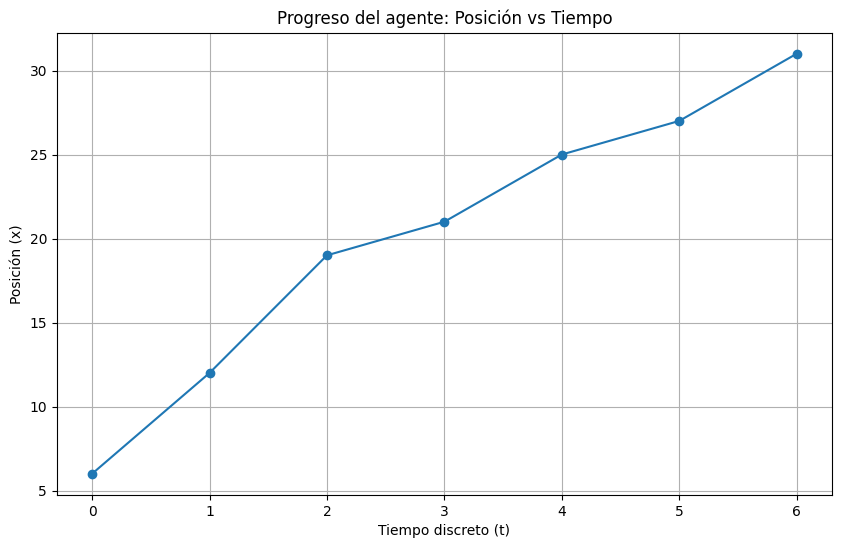

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184

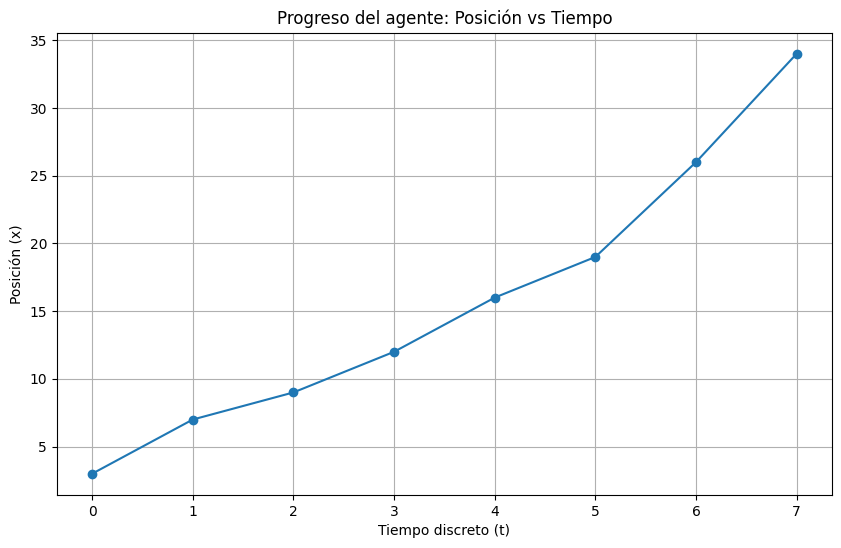

Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.33

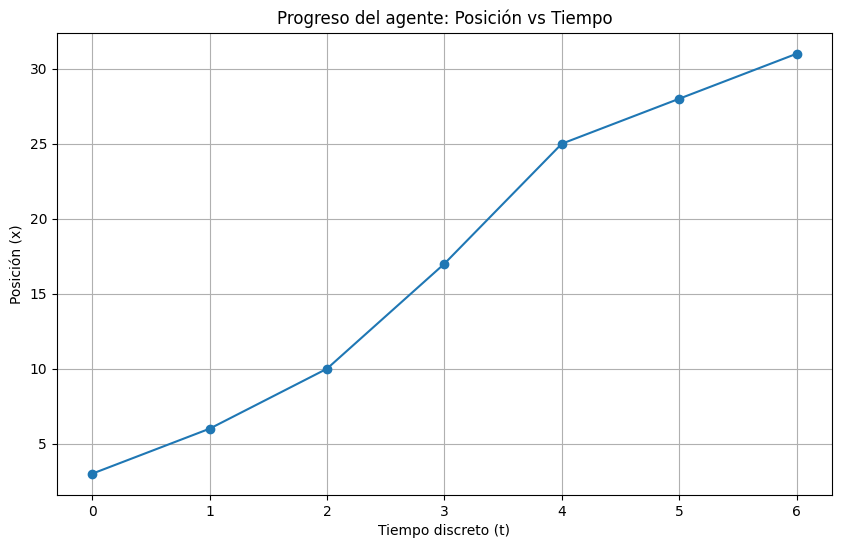

Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.43692799

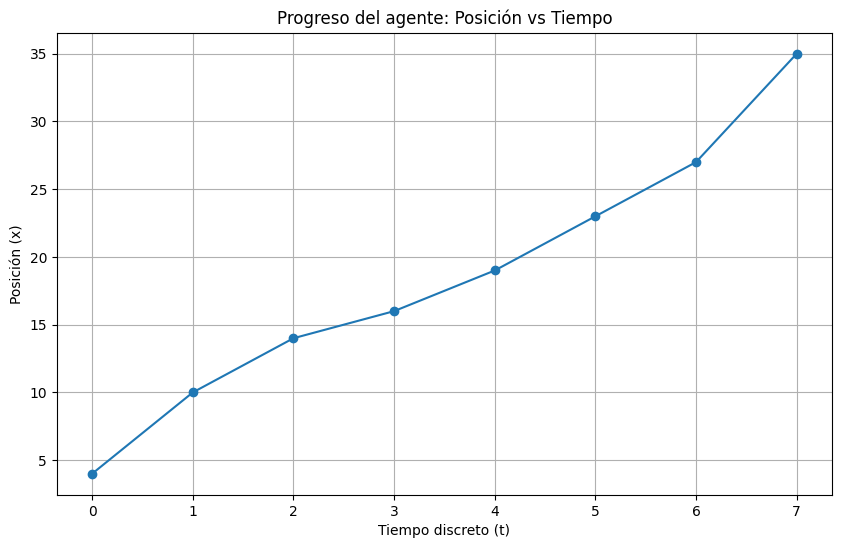

Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.268738

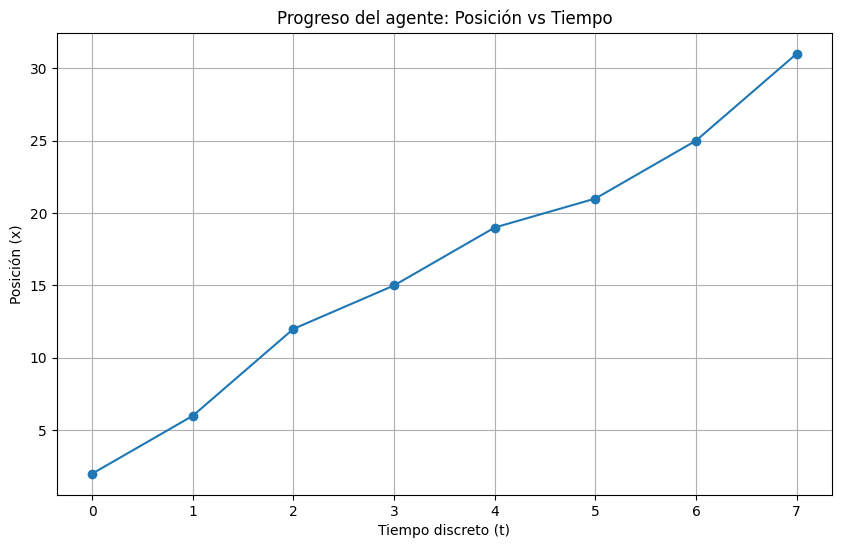

Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16

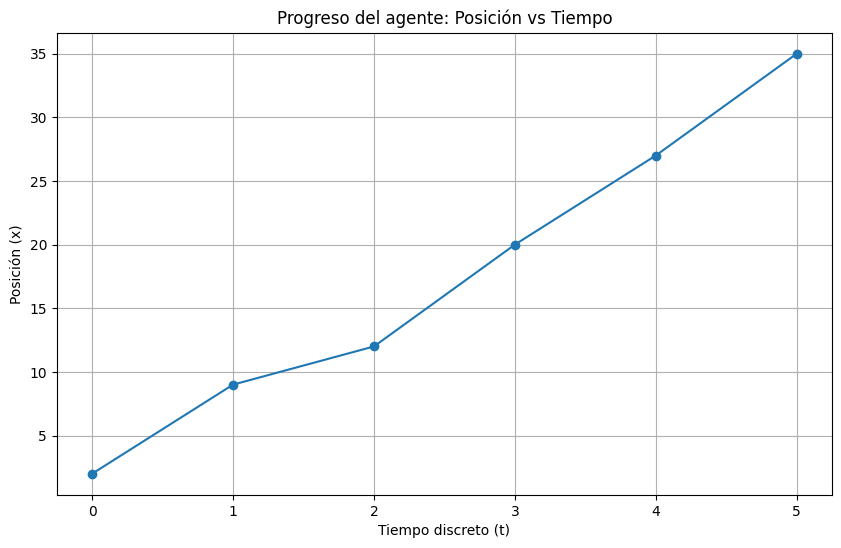

Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.13931406950399997

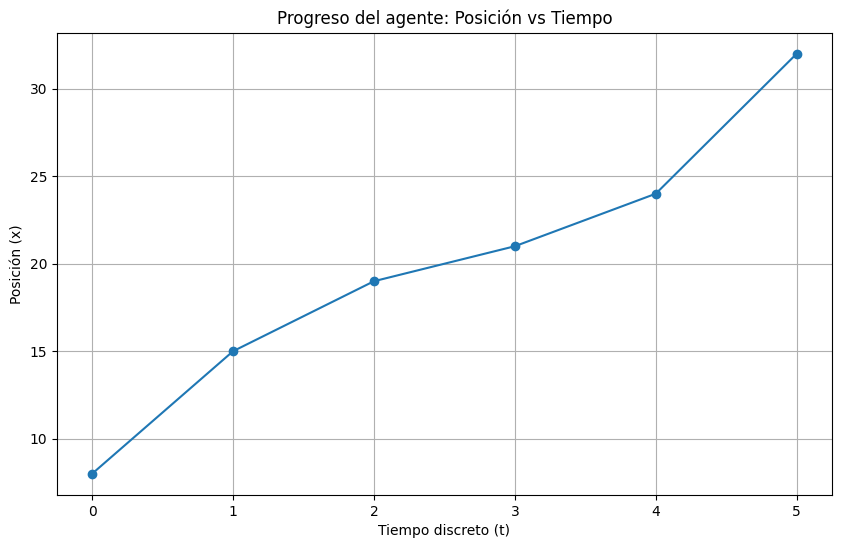

Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-2.5076532510719995, -3.482851737599999

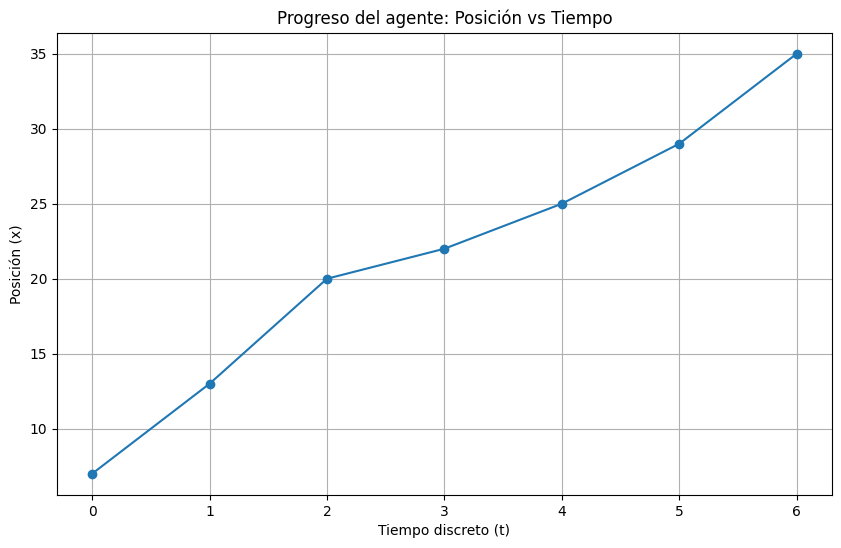

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.8719531213122431, -2.599934890711449, -3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [0.779980

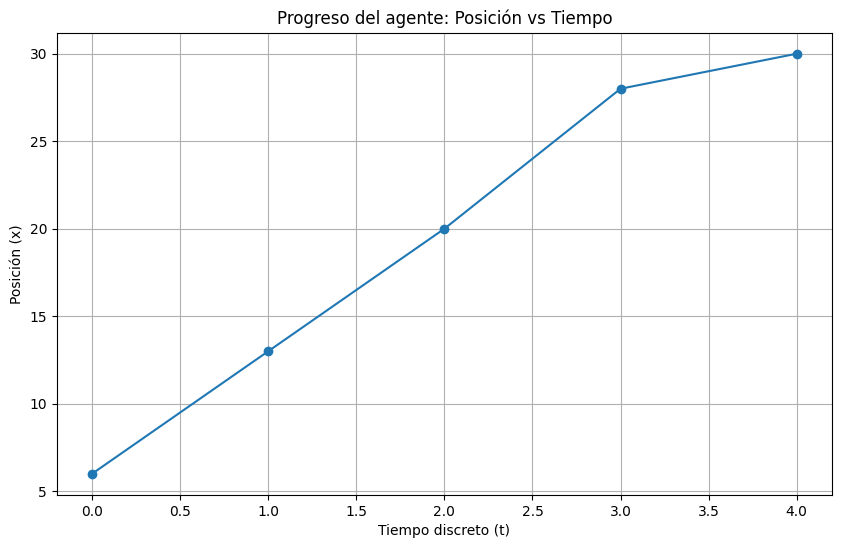

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.

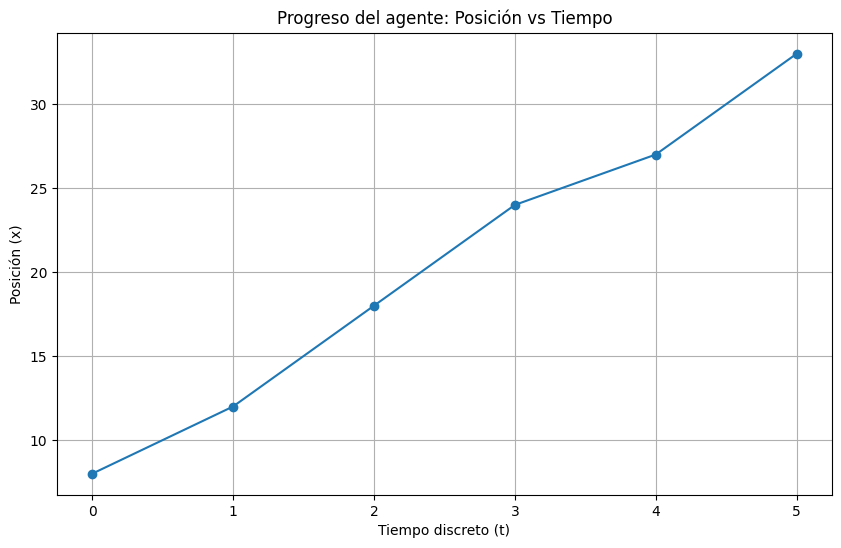

Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.0958682111999996, -4.2

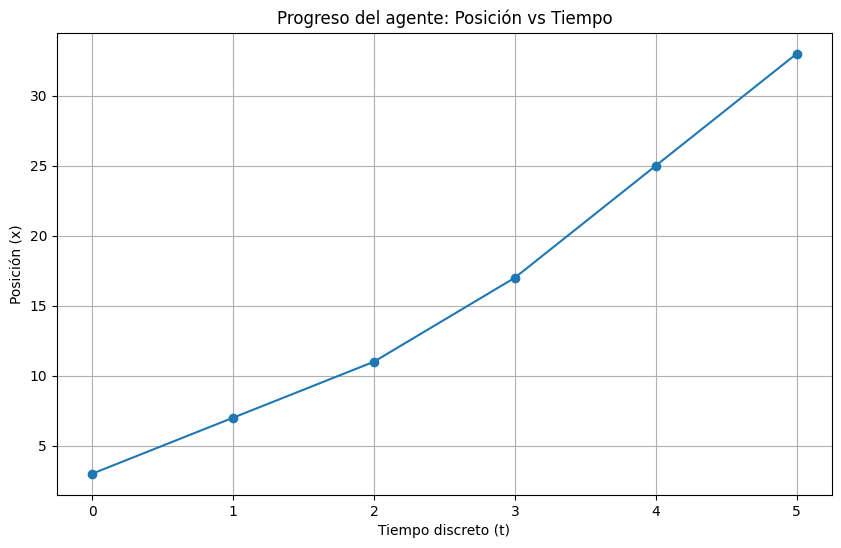

Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.

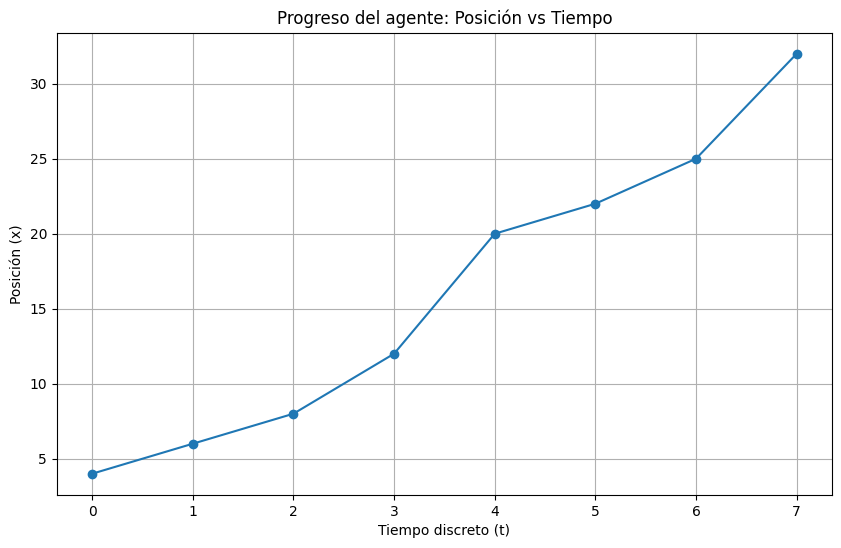

Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.2

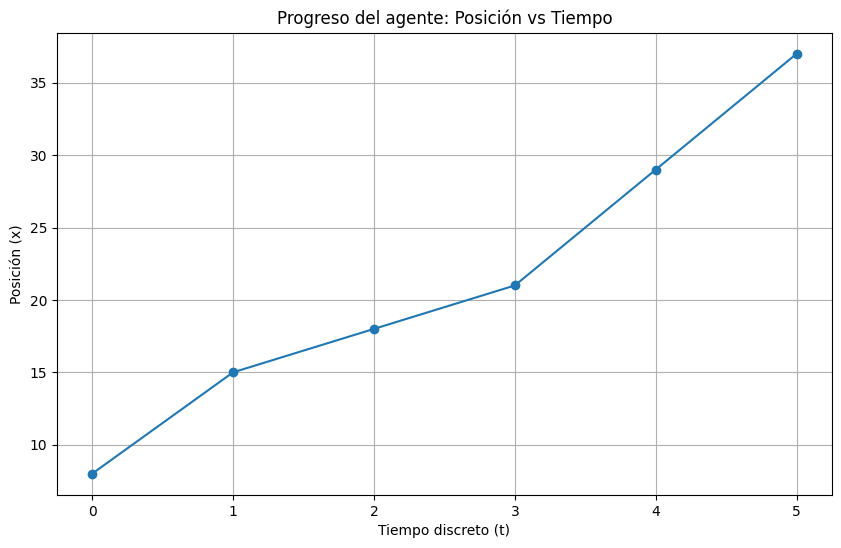

Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.19349176319999997, -0.2687385599999999

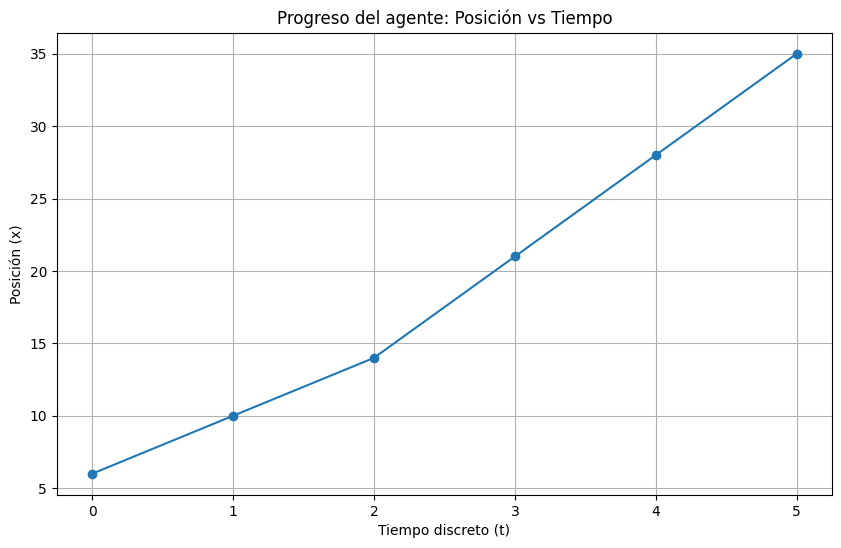

Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-6.826389405695998, -9.481096396799998, -13.168

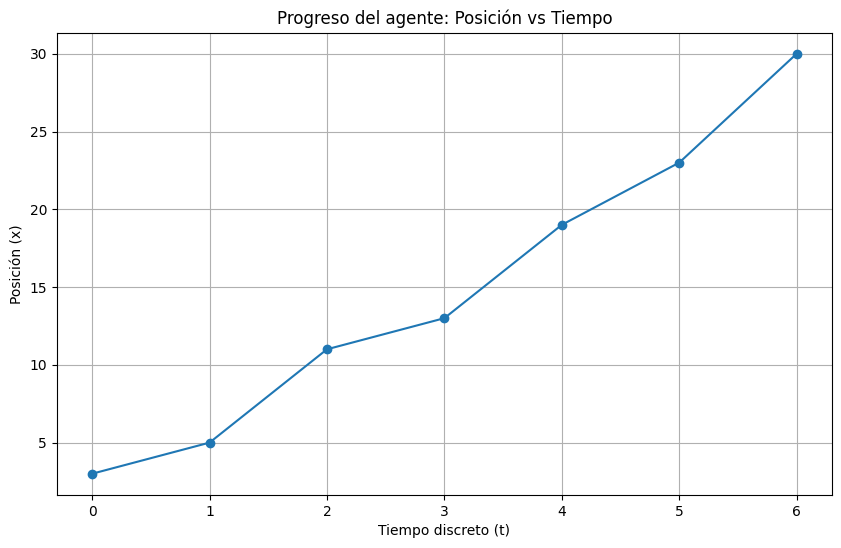

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.3

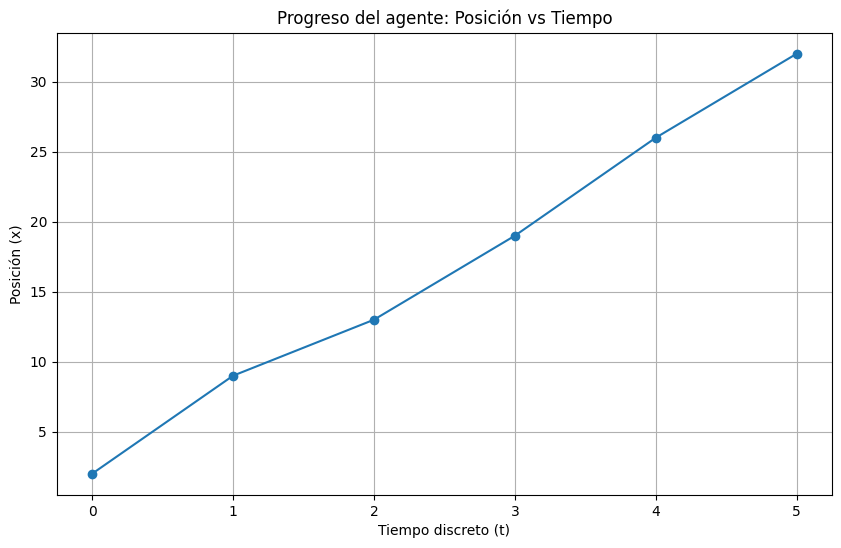

Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0

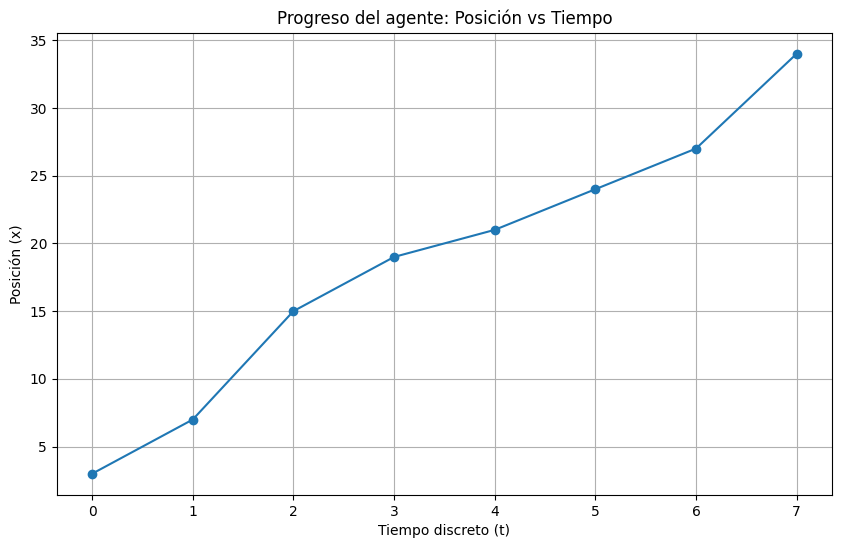

Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.5388002679128054, -4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.71846

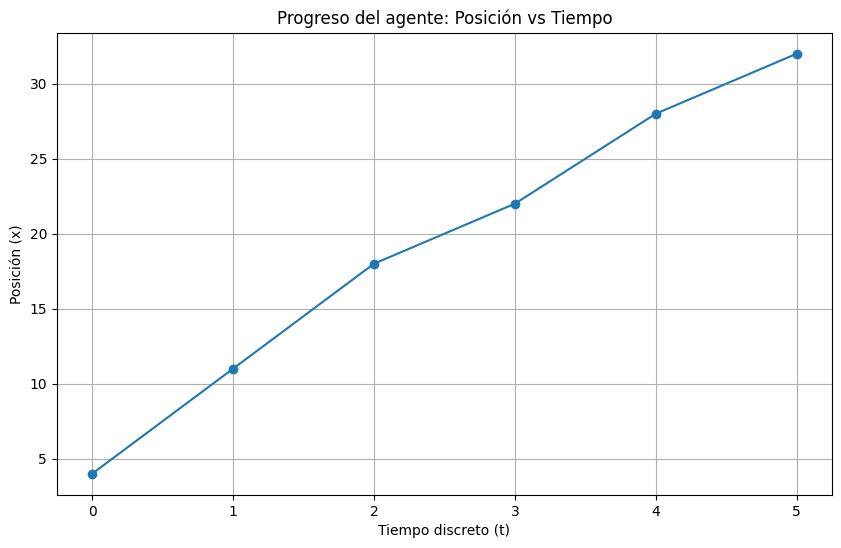

Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4

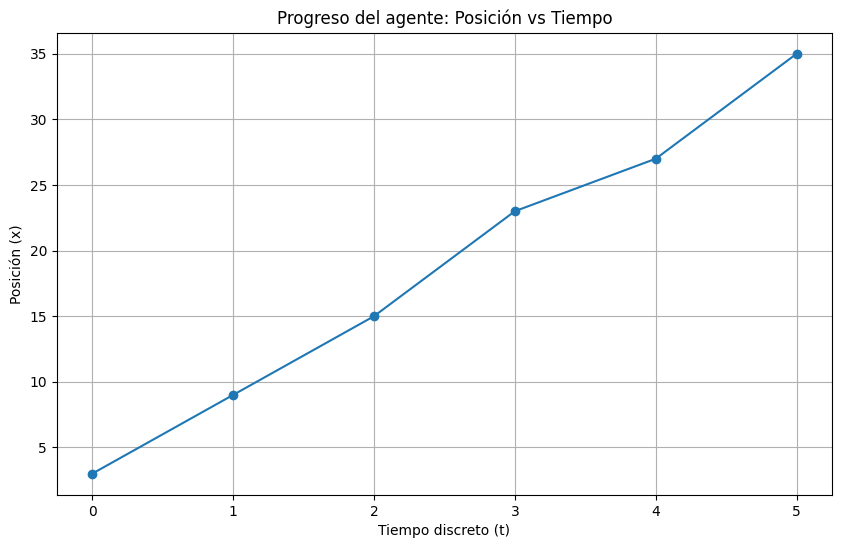

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Ret

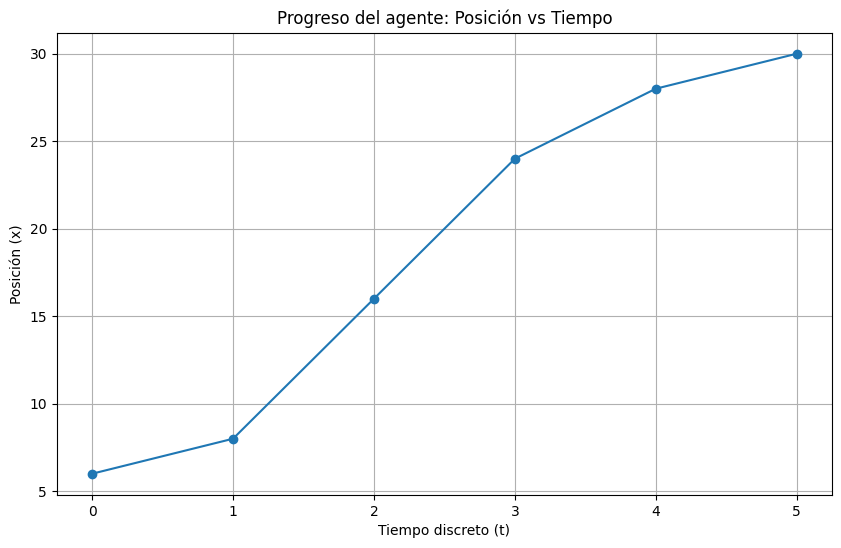

Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retorno

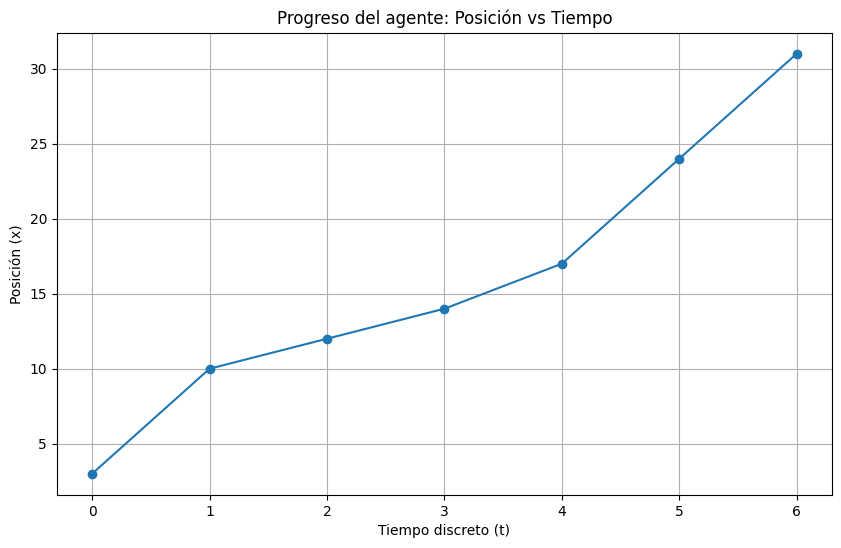

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399

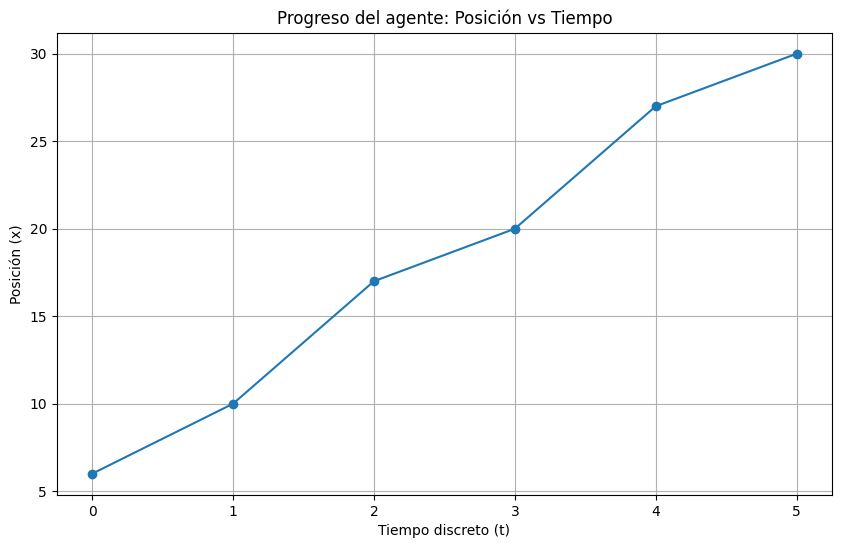

Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.77

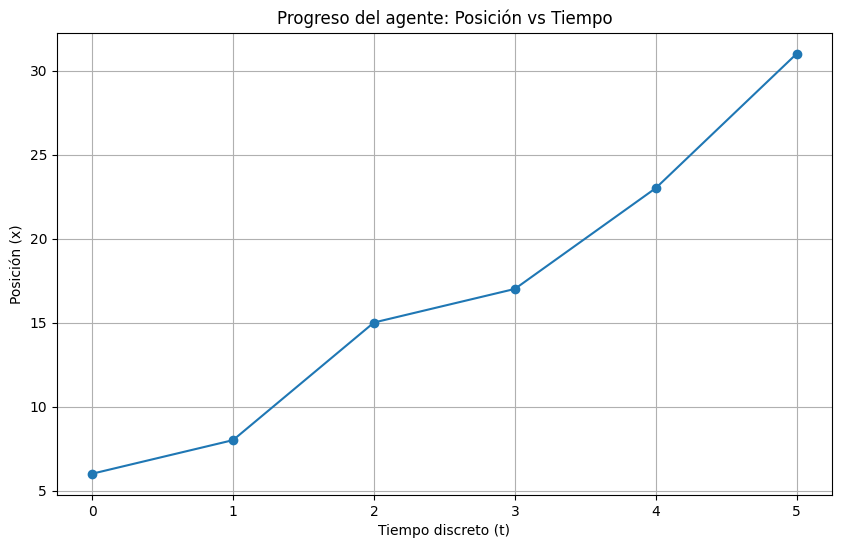

Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.3732479

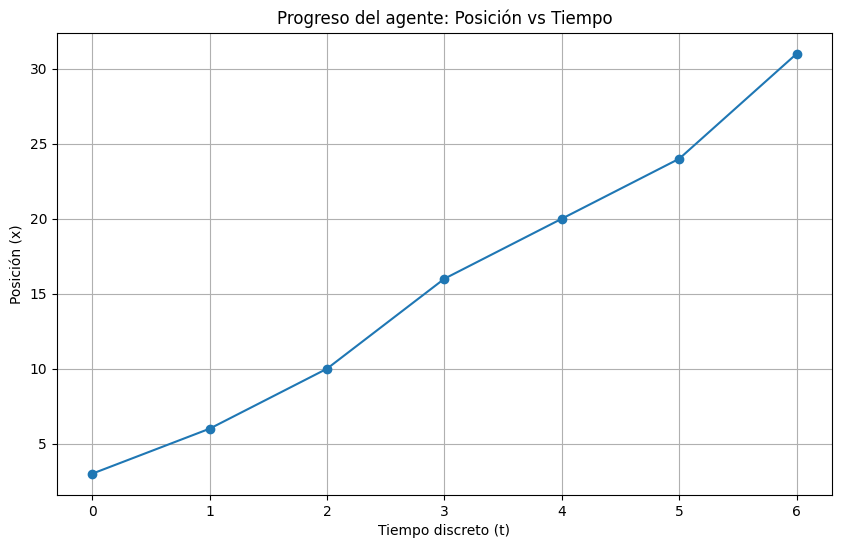

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.4012245201715199, -0.5

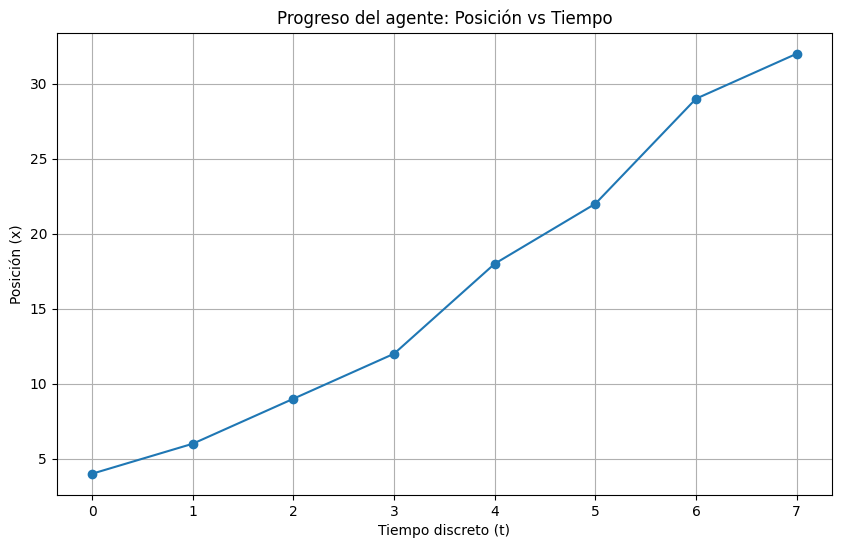

Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996,

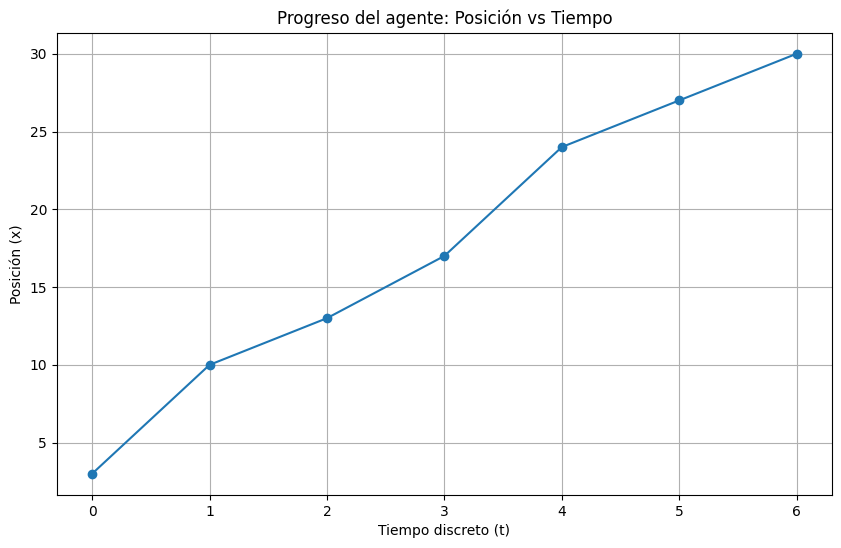

Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.5388002679128054, -4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: 

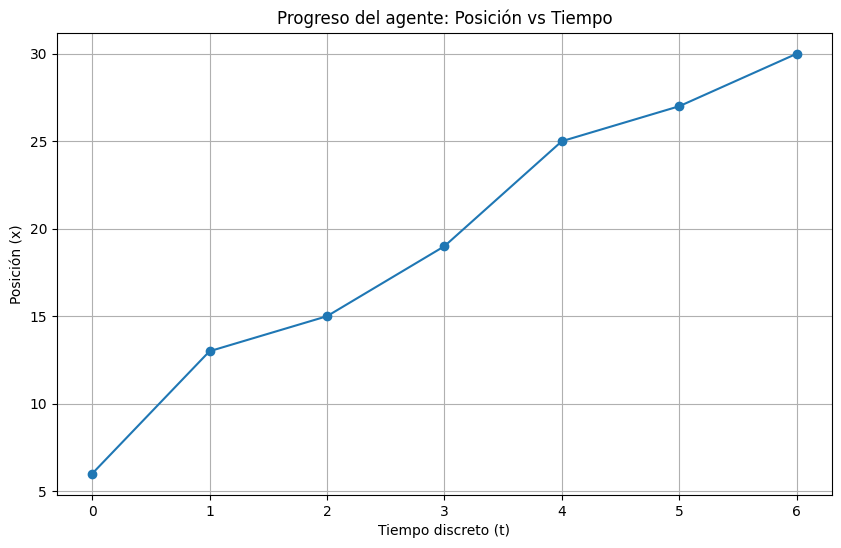

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-1.6048980806860795, 

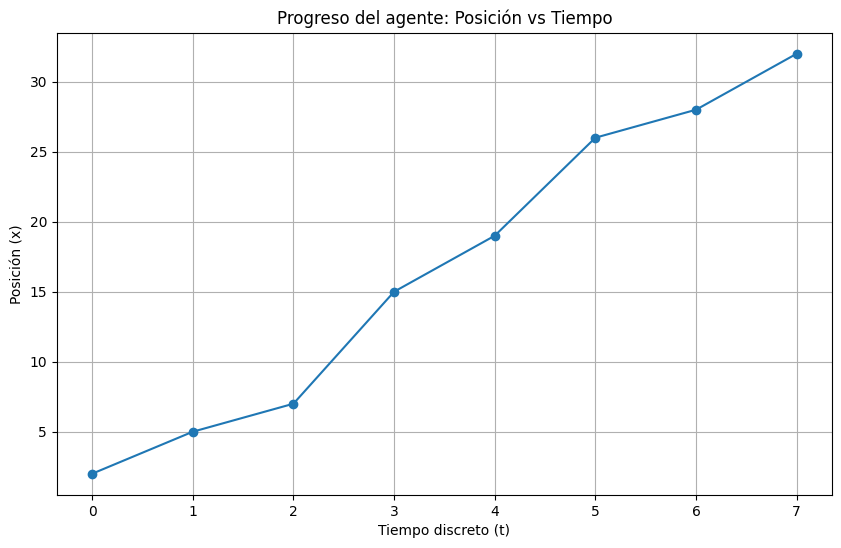

Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.33119999999999

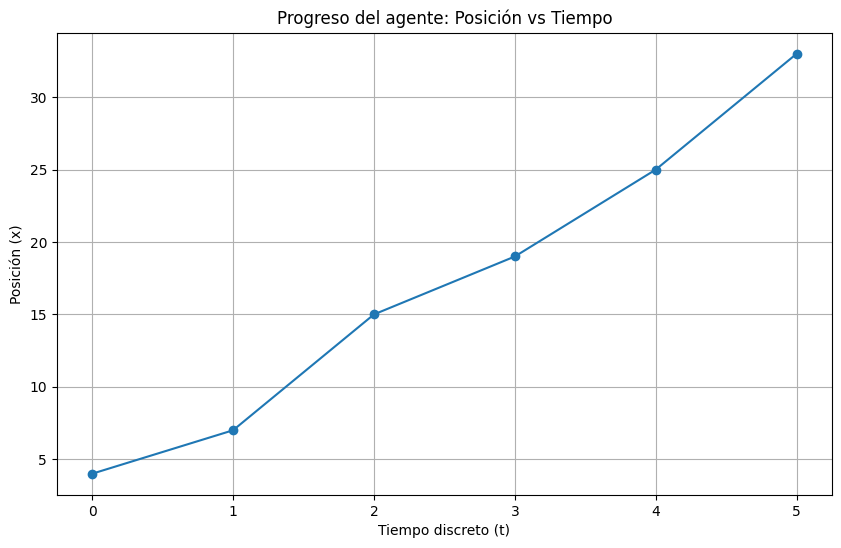

Retornos: [-0.05199869781422897, -0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.8719531213122431, -2.599934890711449, -3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999

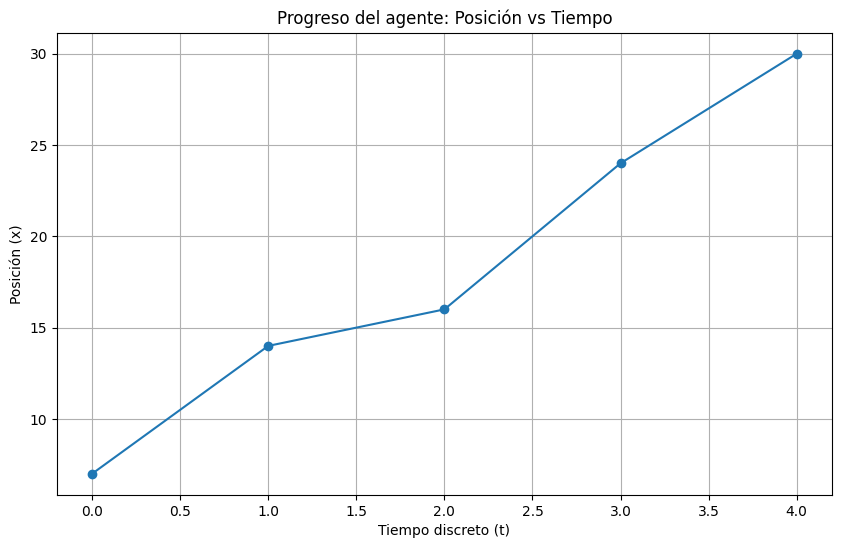

Retornos: [-3.5388002679128054, -4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.5388002679128054, -4.915000372101119, -

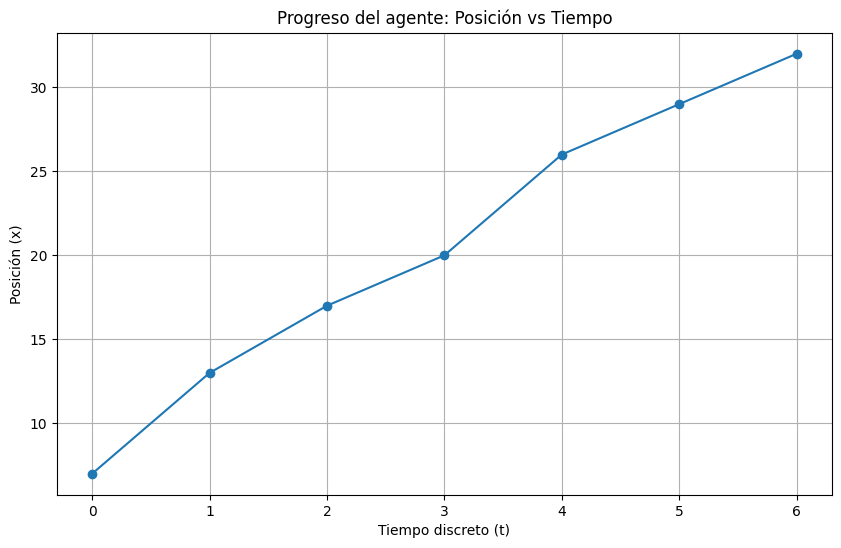

Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.2687385599999

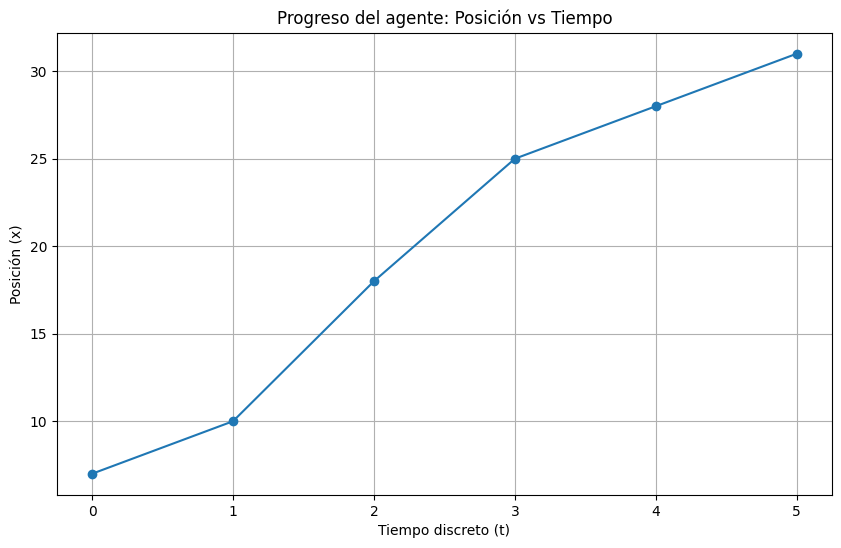

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.7414258687999997, -2.41864

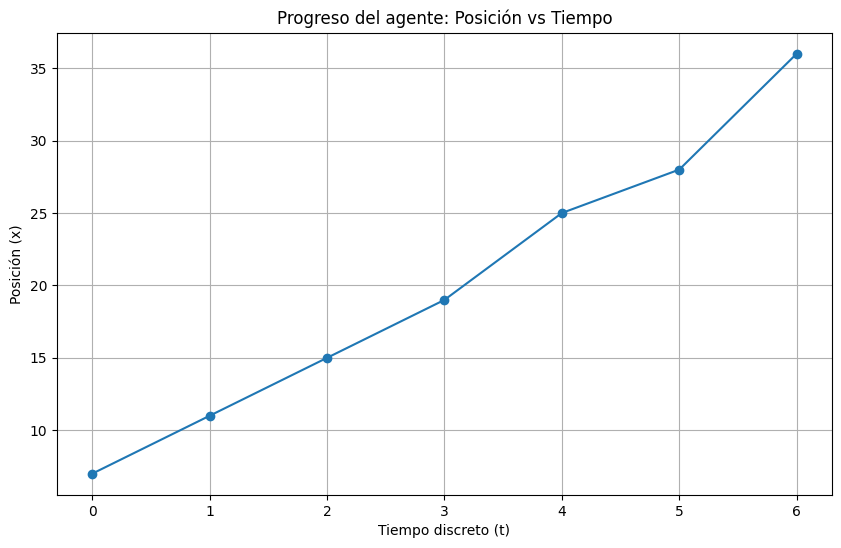

Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.268738559999999

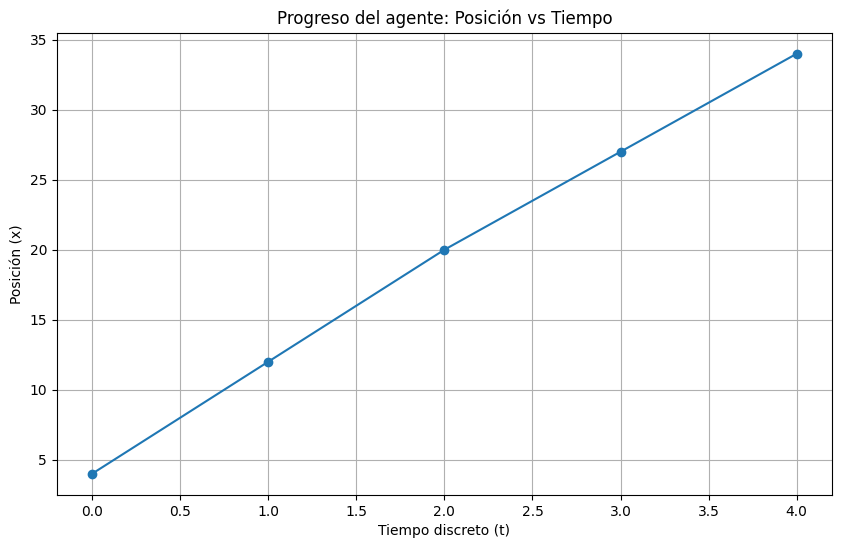

Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.2079947912569159, -0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.5572562780159999, -0.77

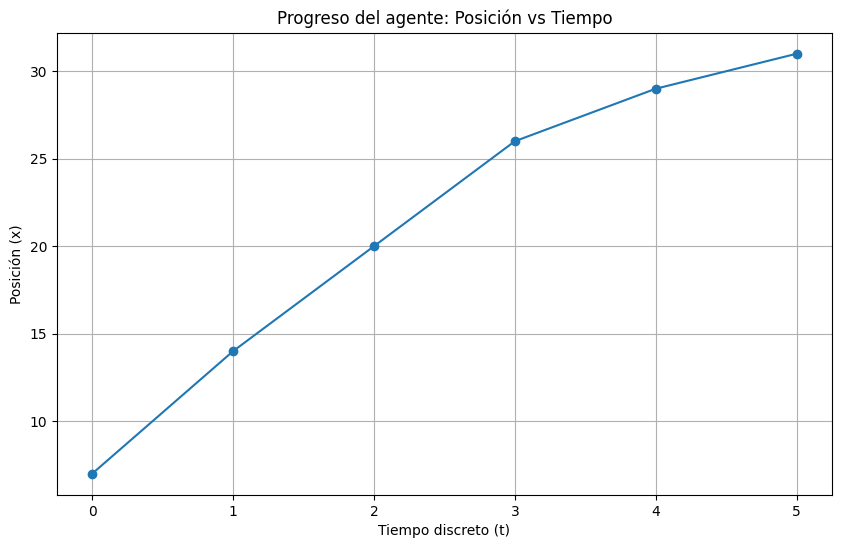

Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.29

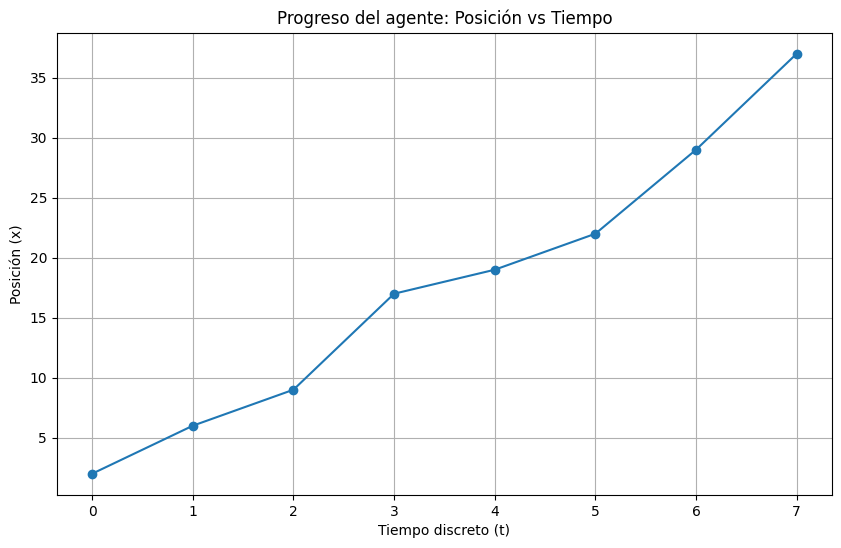

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.2687

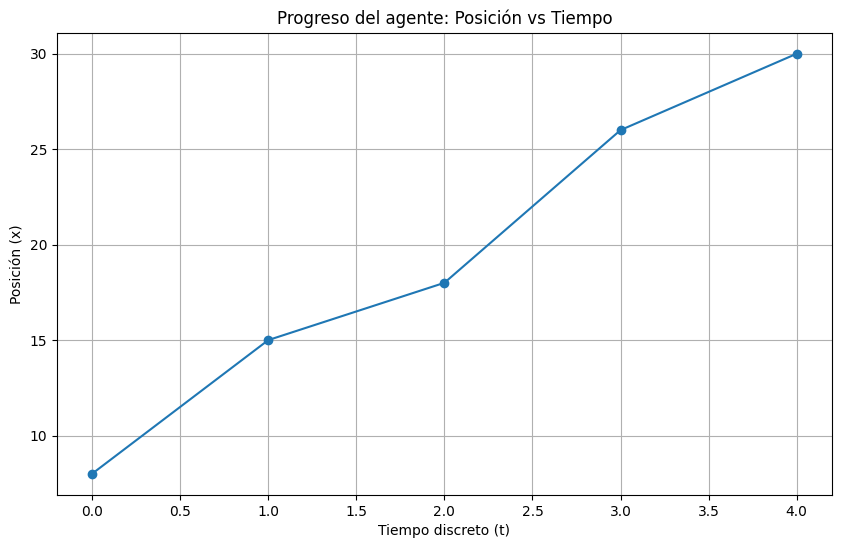

Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.902755170385

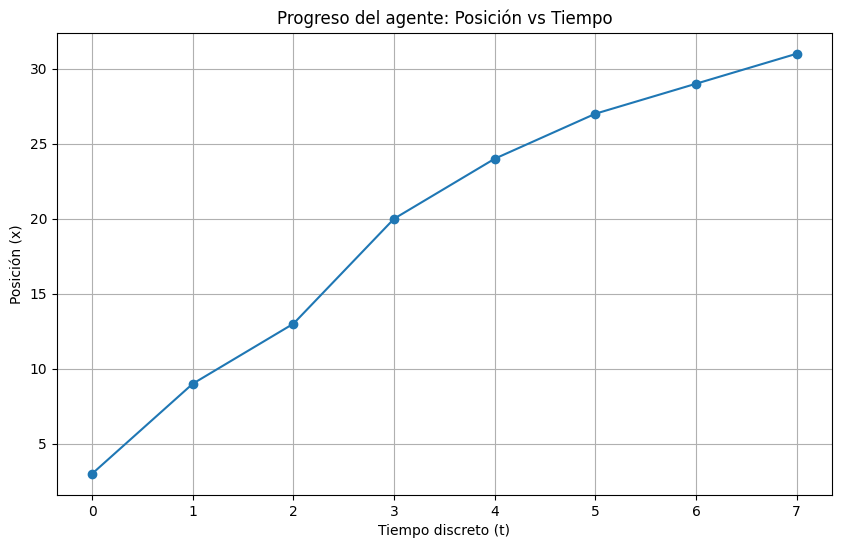

Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.599934890711449, -3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.4828517375999994, -4.8

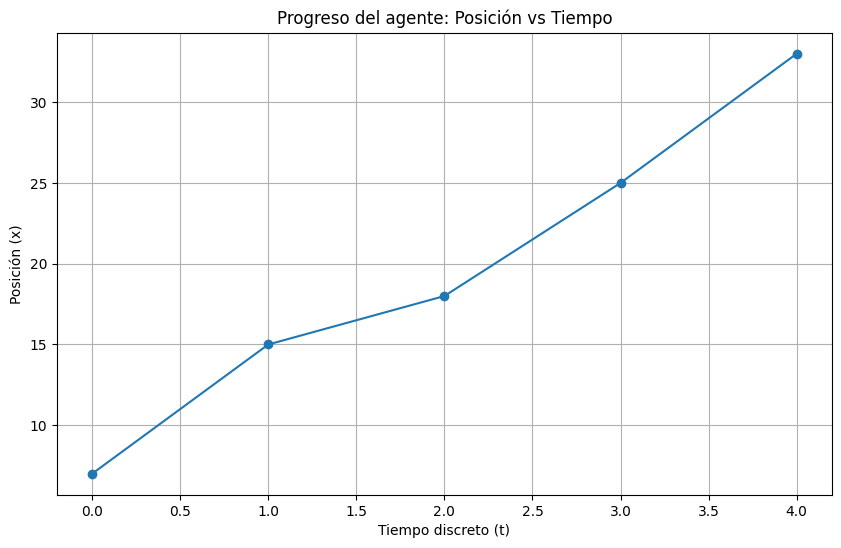

Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.54793619289722, -3.5388002679128054, -4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9

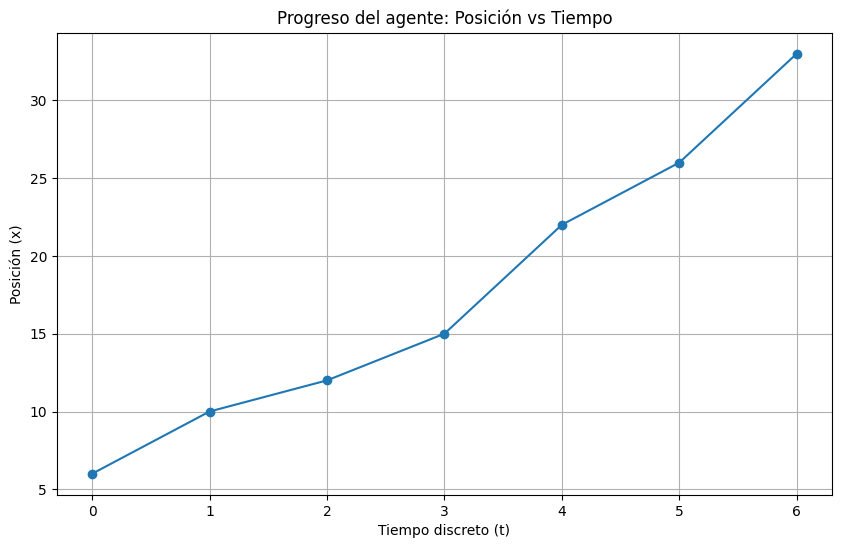

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.95999999999999

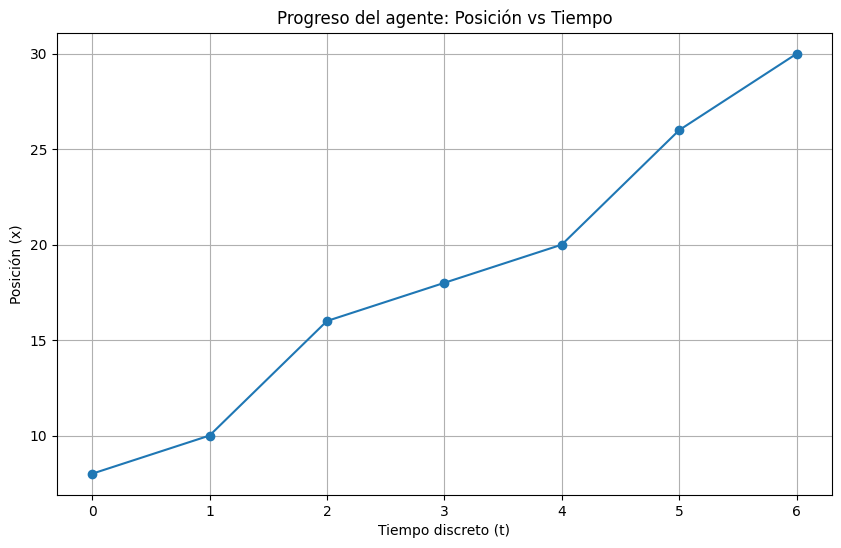

Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.741425868799

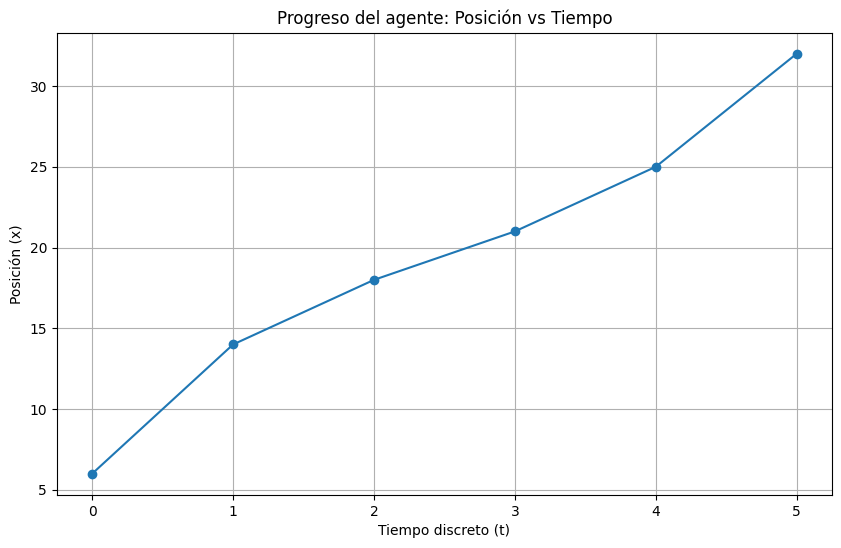

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.79999999999999

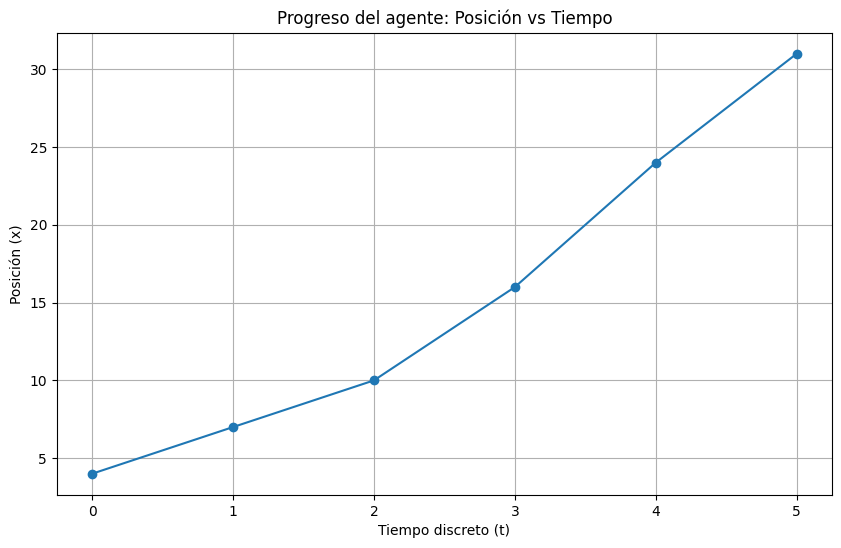

Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.4679882803280608, -0.6499837226778622, -

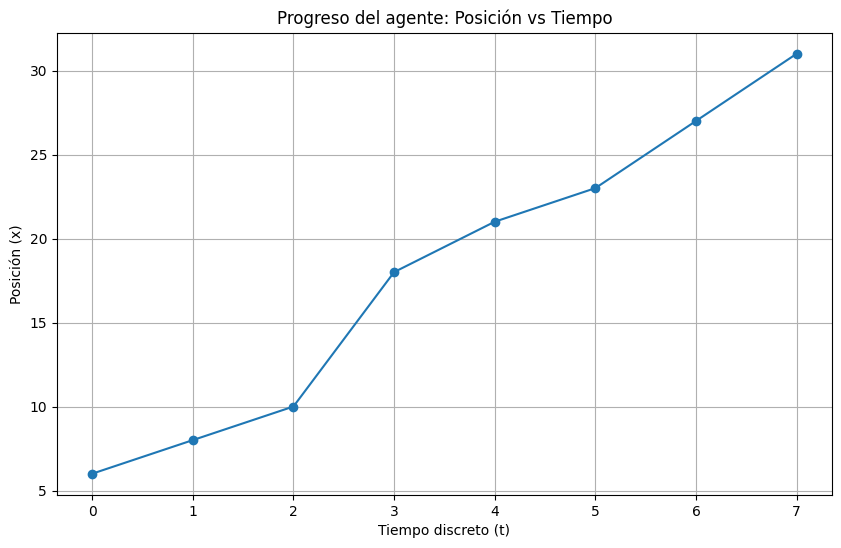

Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.13931406950399997, -0.19349176319999

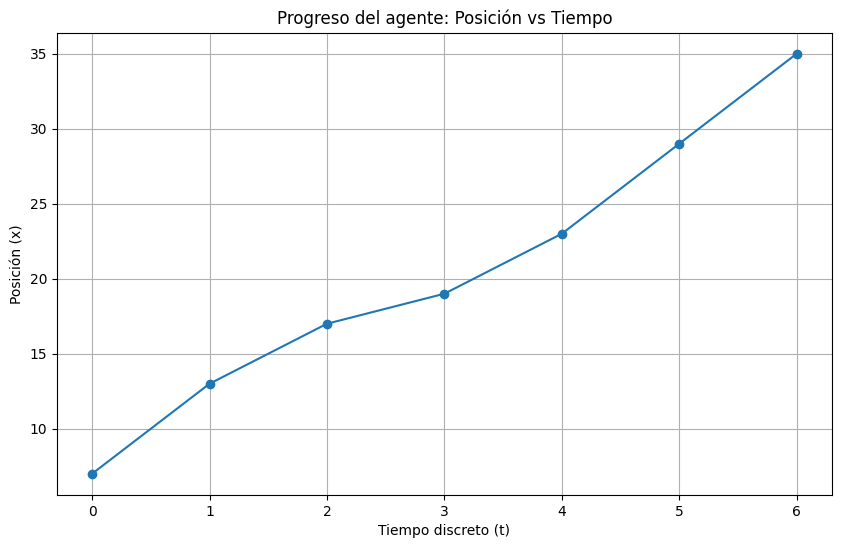

Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999

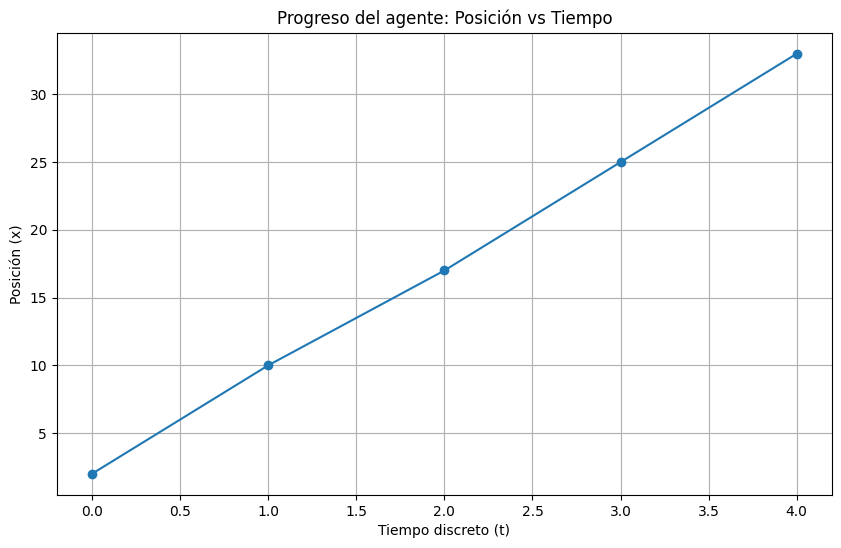

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: 

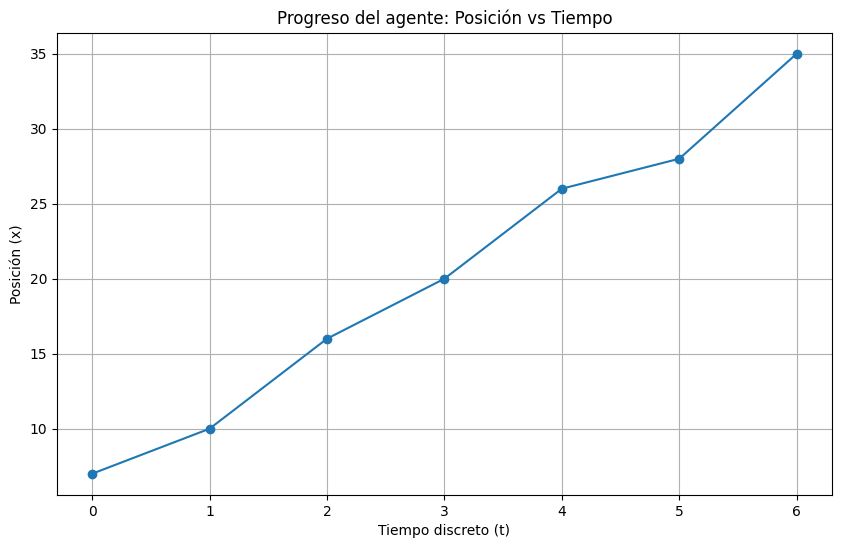

Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.2888816545

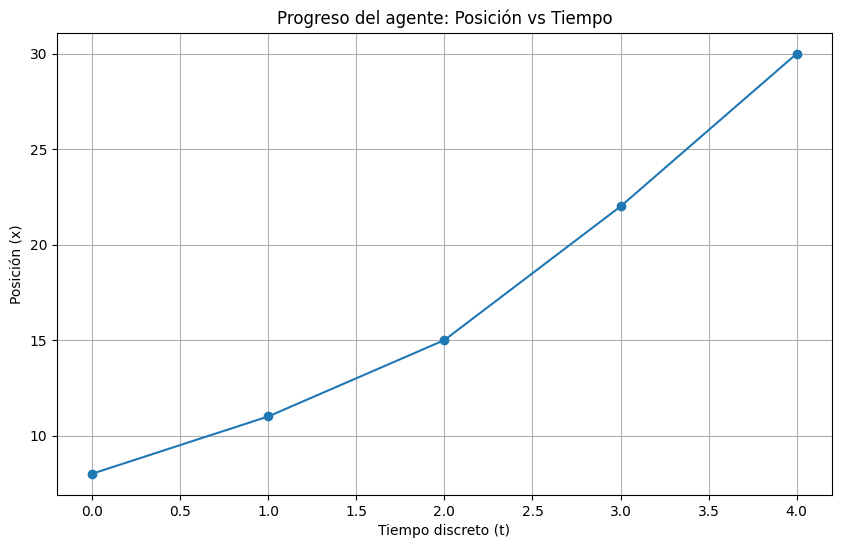

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.26873855999999996, -0

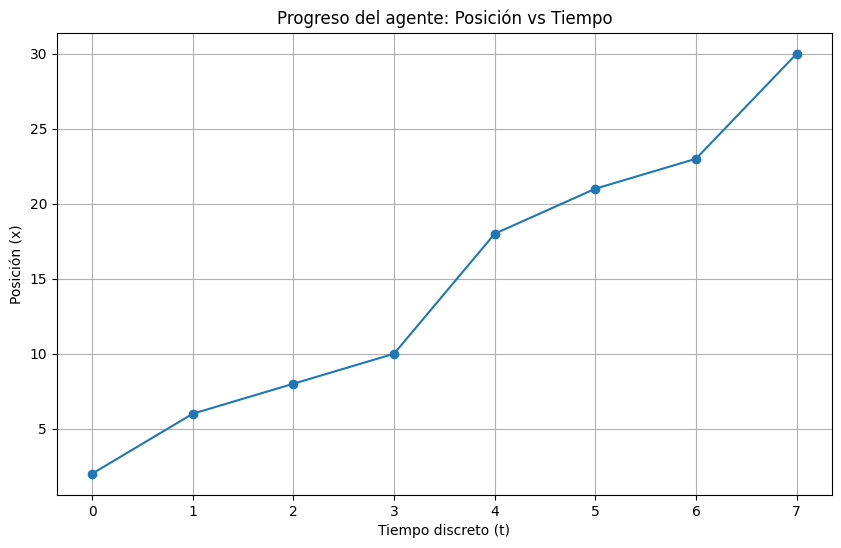

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.35923199999

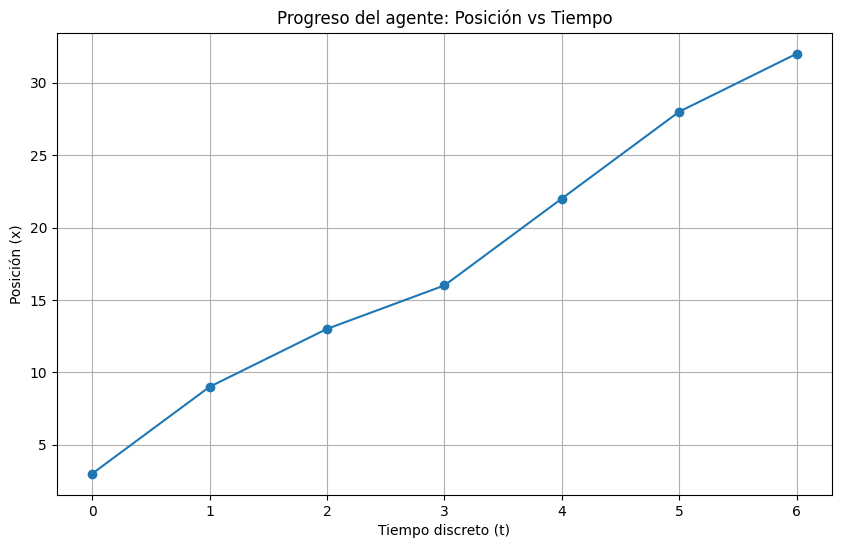

Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.22902511

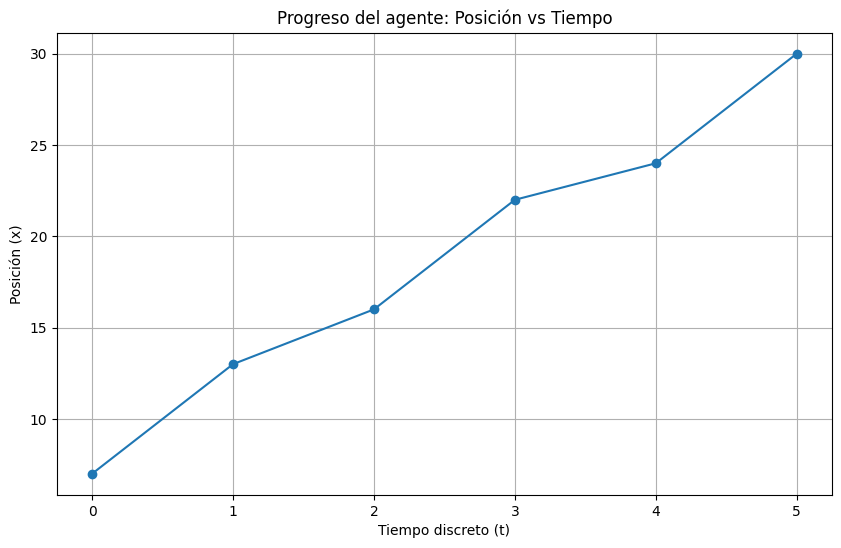

Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.5388002679128054, -4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999,

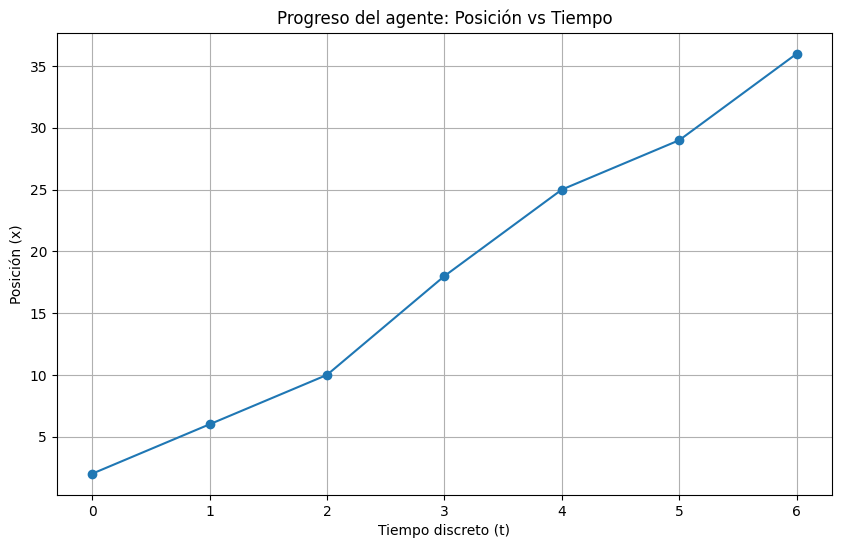

Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.77599999

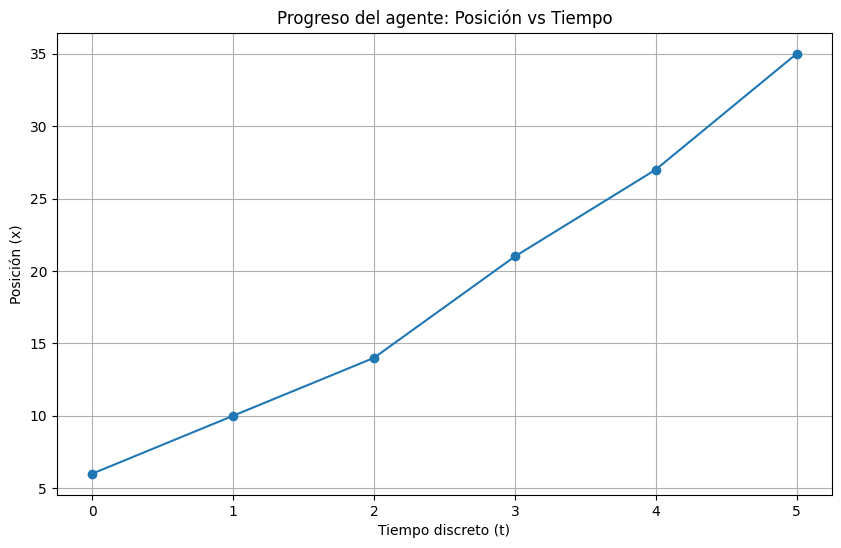

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-9.481096396799998, -13.168189439999997, -18.28915

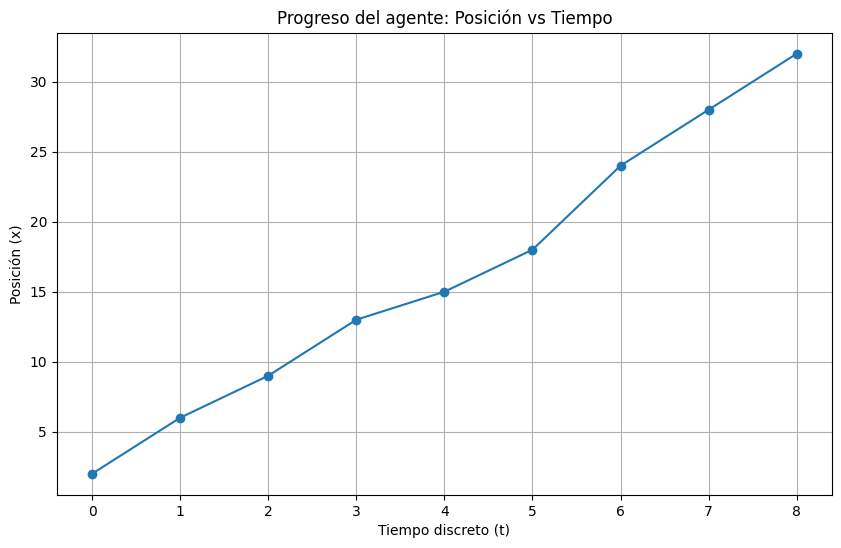

Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.2999674453557244, -1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -

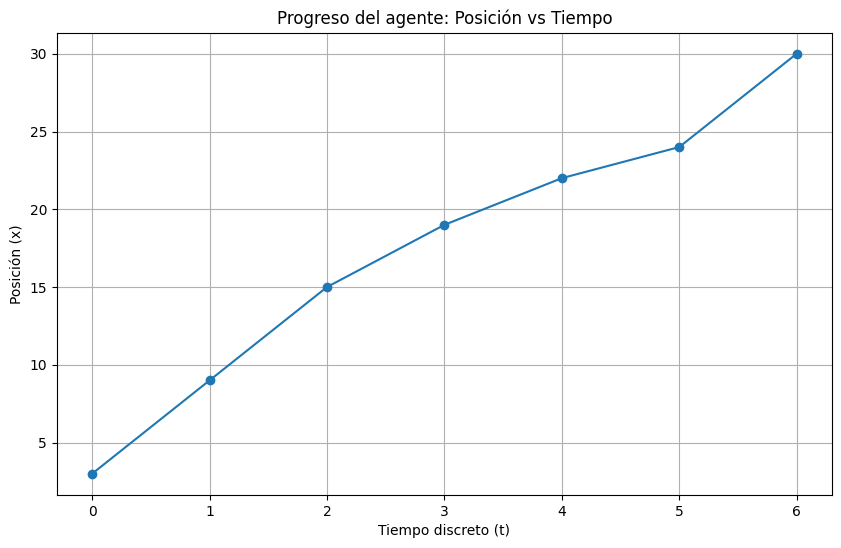

Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [

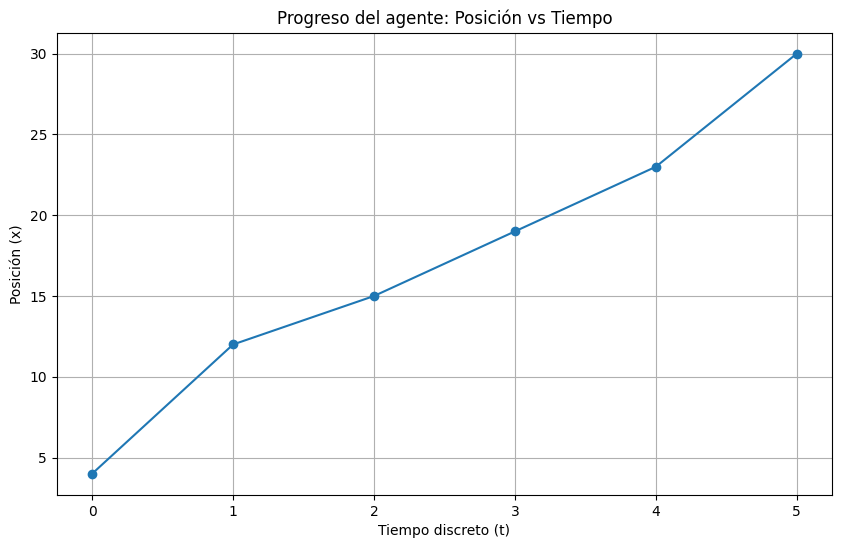

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-3.611020681543679, -5.015306502143999

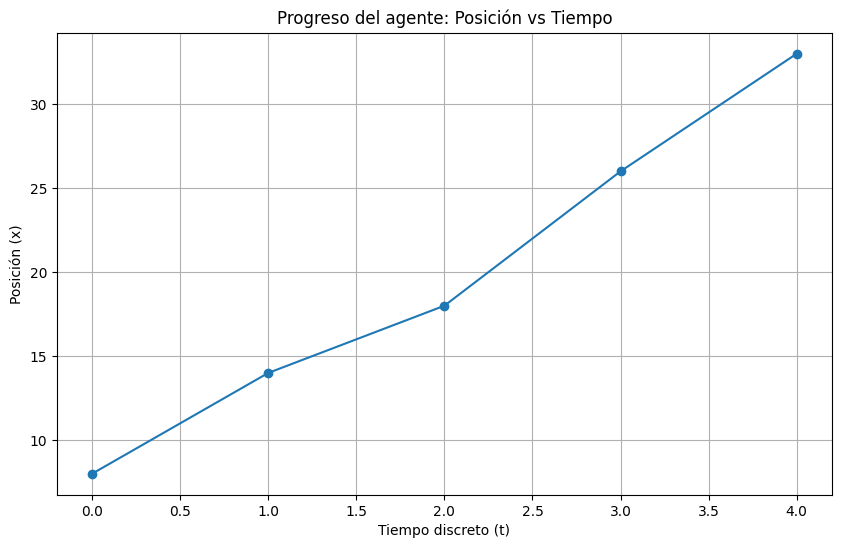

Retornos: [-0.2079947912569159, -0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.2999674453557244, -1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [4.031078399999999, 5.598

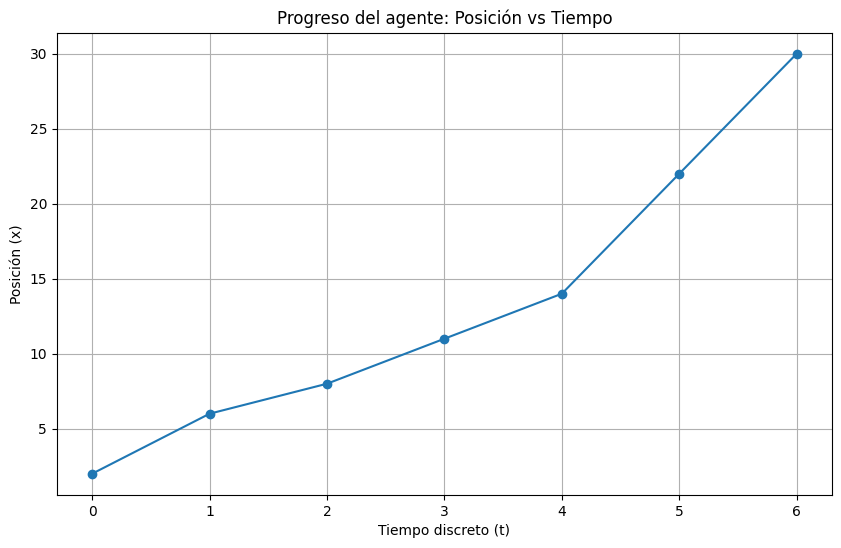

Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, 

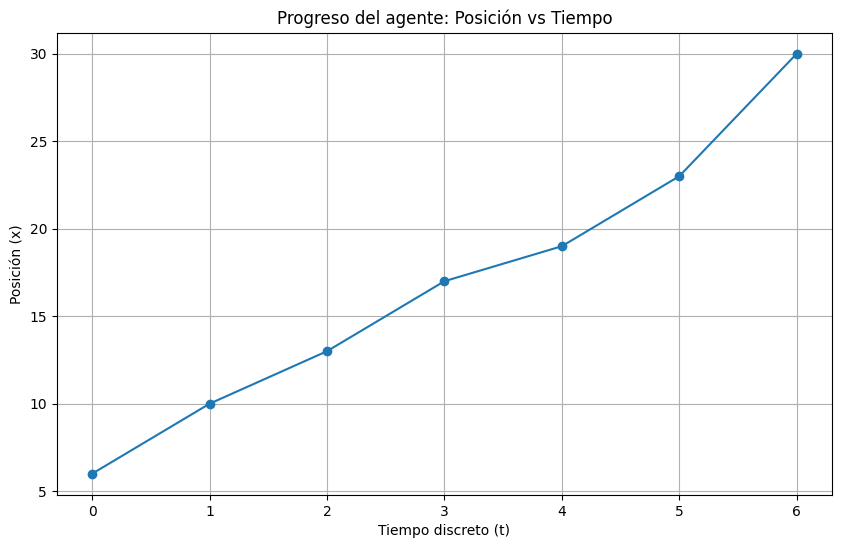

Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.2290251120639994

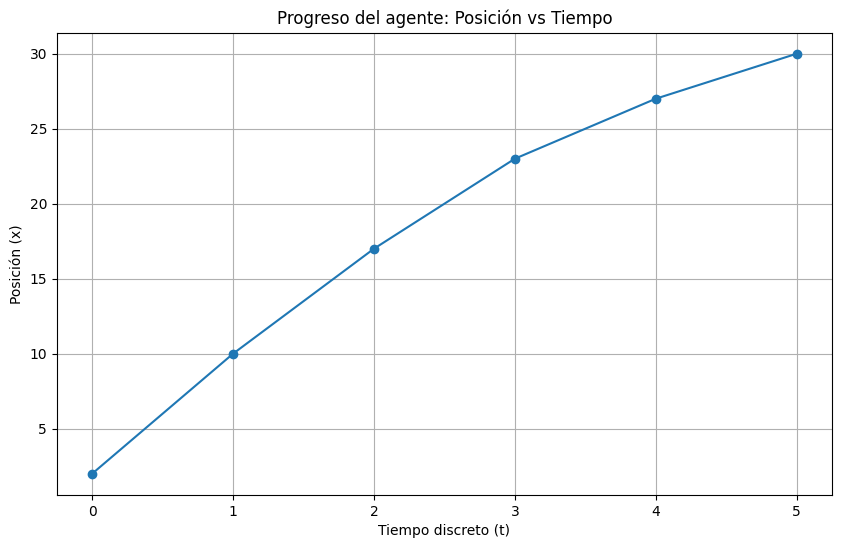

Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9

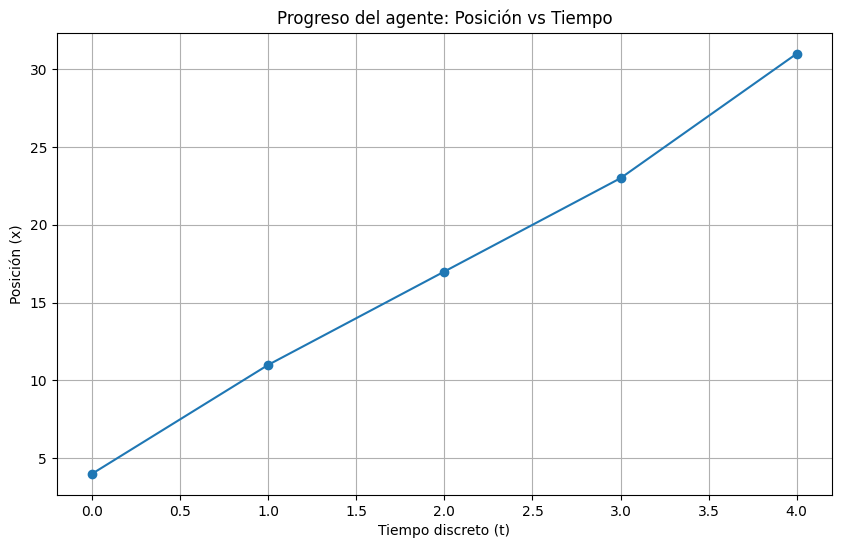

Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [1.0833062044631037, 1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.60489808068

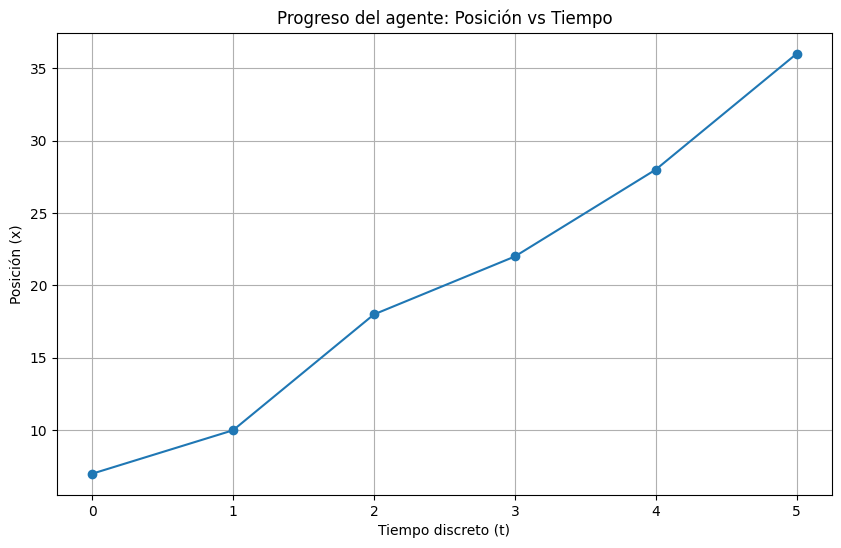

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Reto

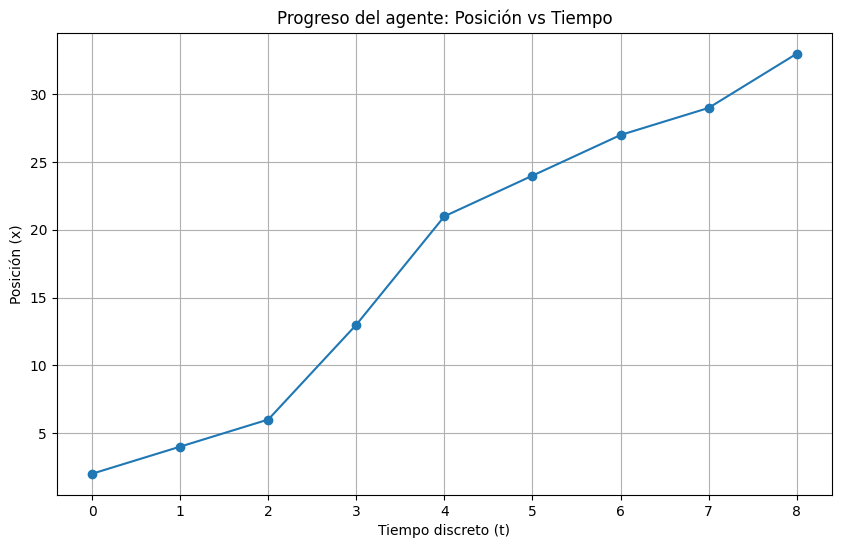

Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [

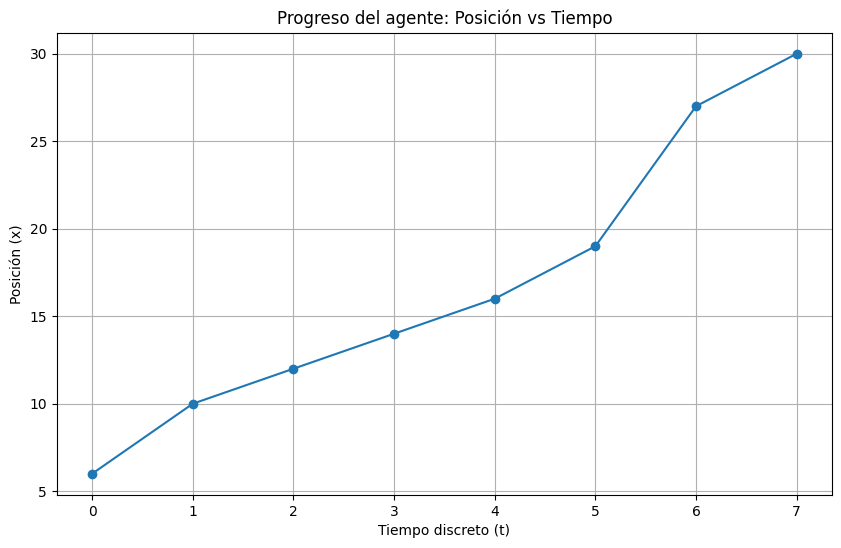

Retornos: [-0.6499837226778622, -0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997,

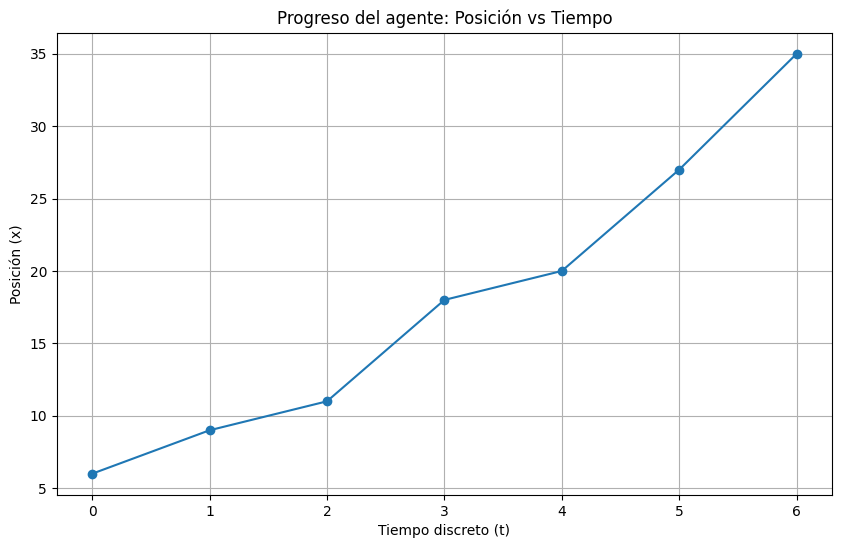

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.8319791650276636, -1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.4828517375999994, -4.837294079999999

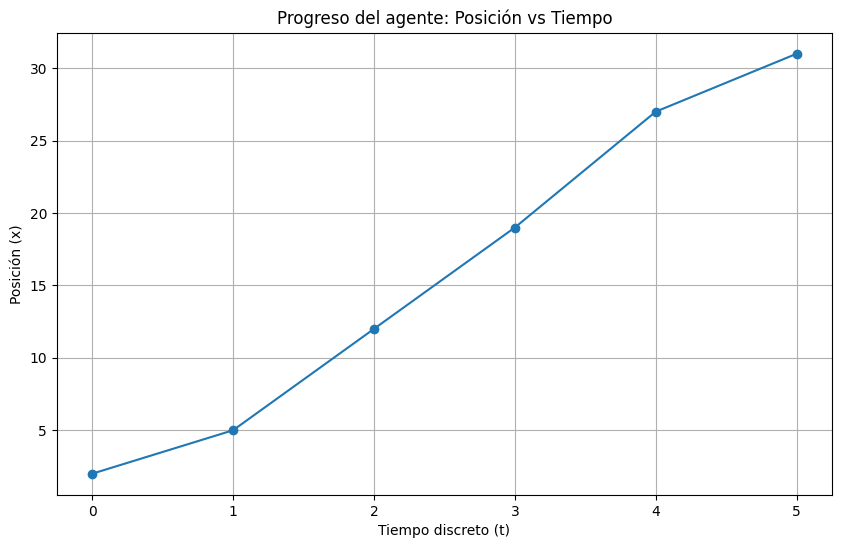

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.

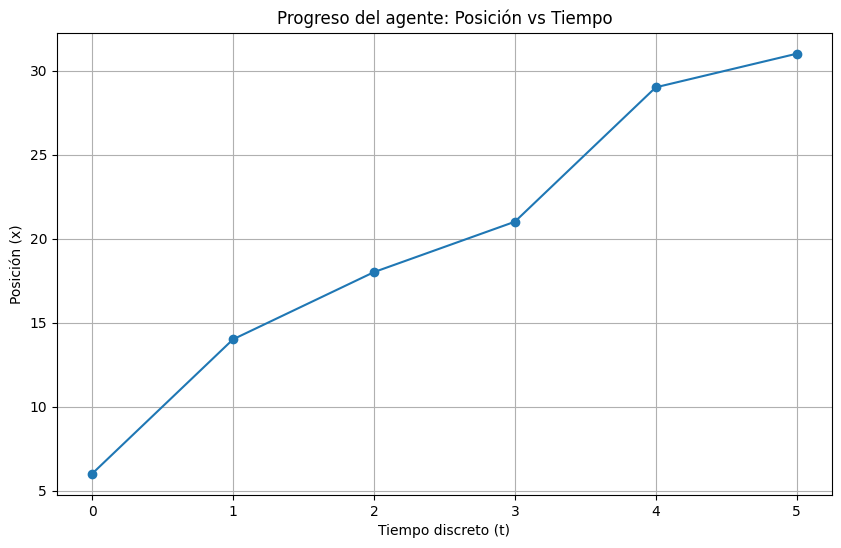

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -

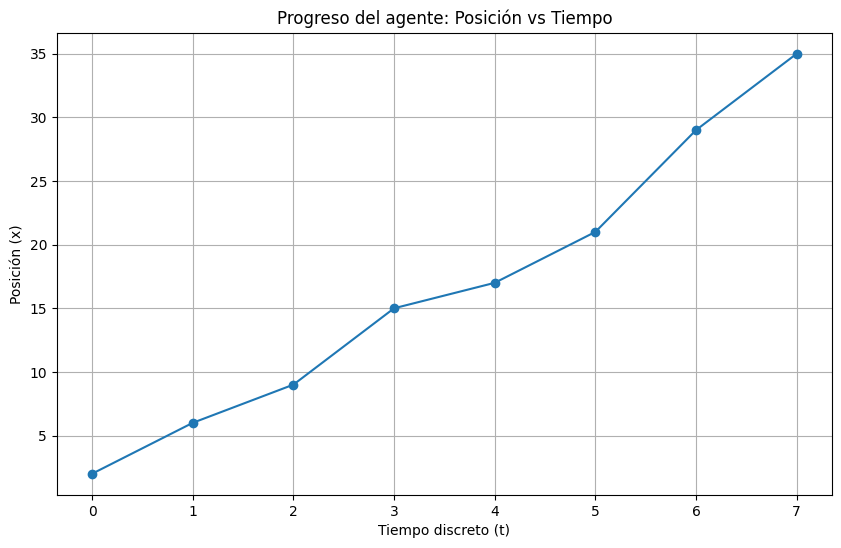

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.0897110425599994, 2.9023764

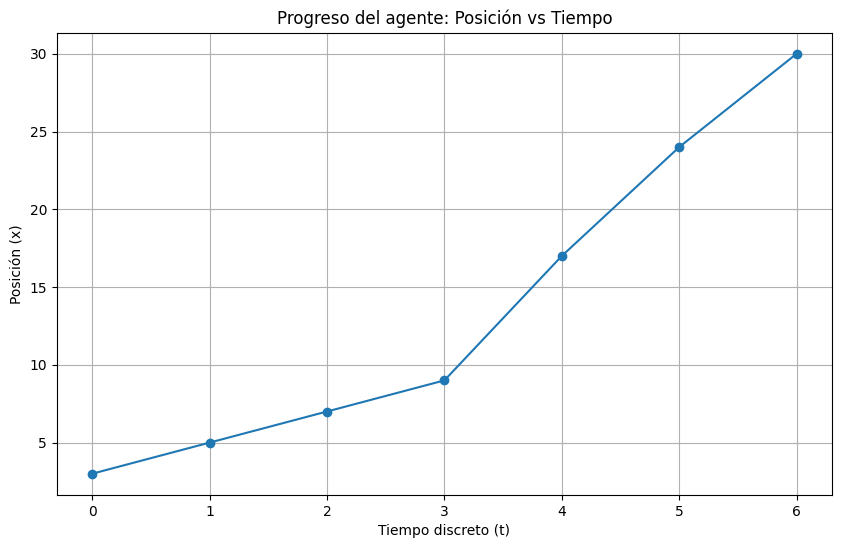

Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.67458815

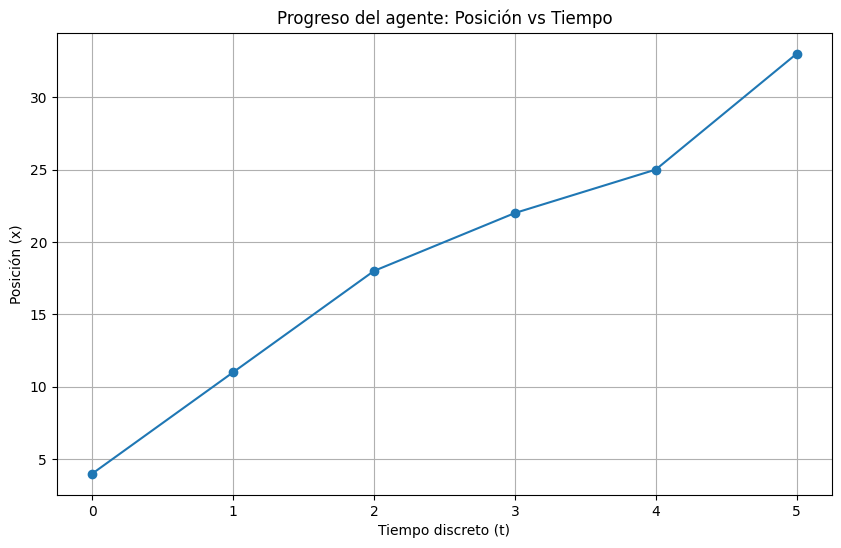

Retornos: [-6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -

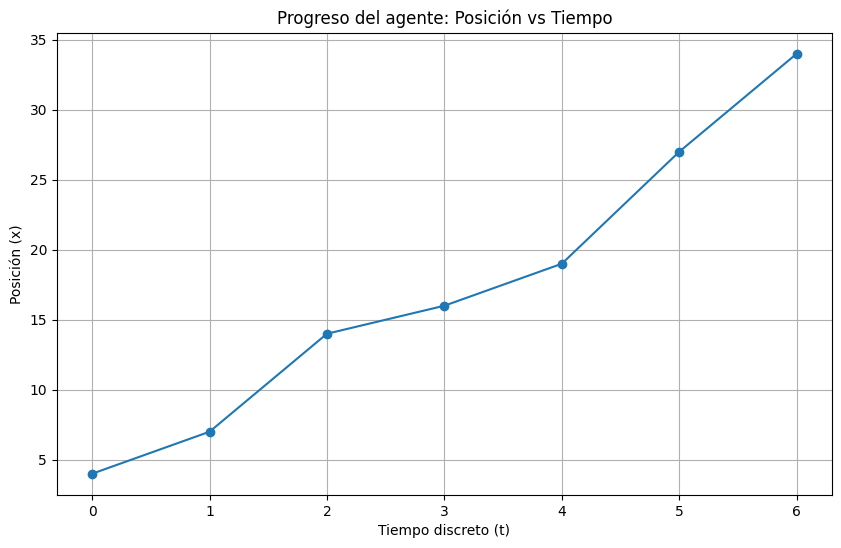

Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.2079947912569159, -0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.13931

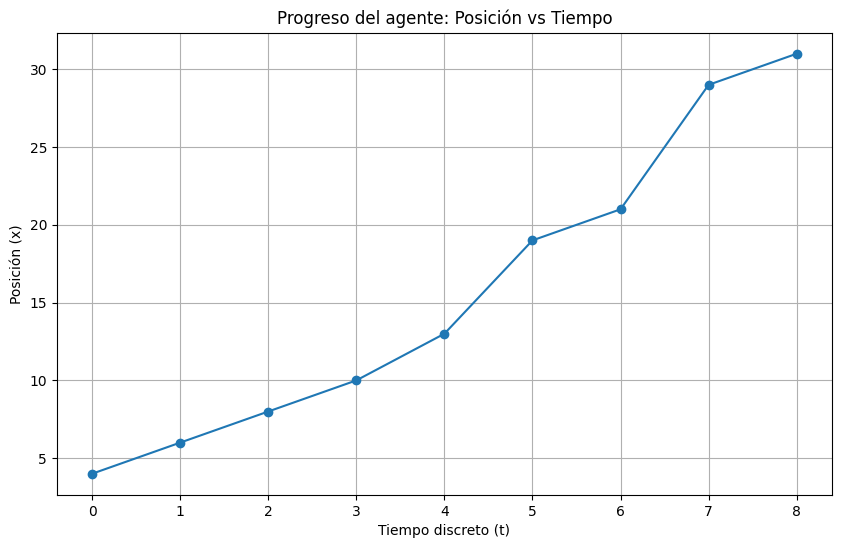

Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.7414258687999997, -2.418

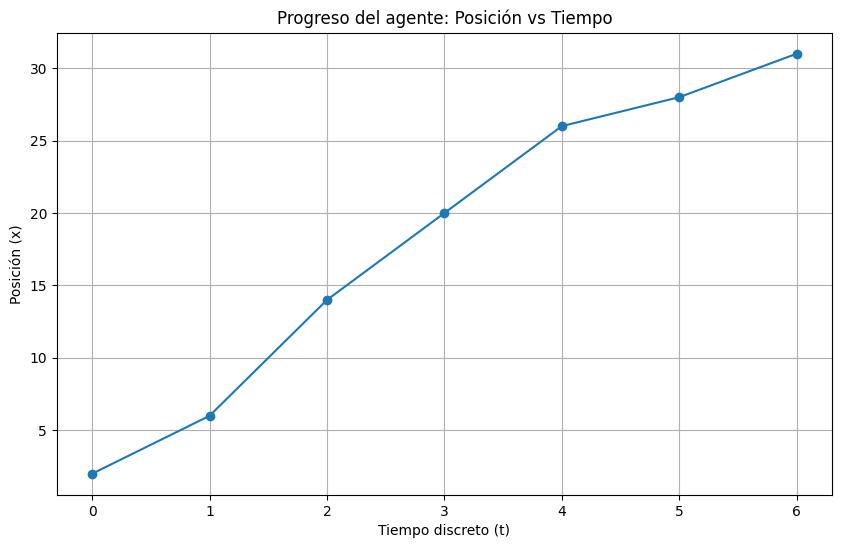

Retornos: [-0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.07

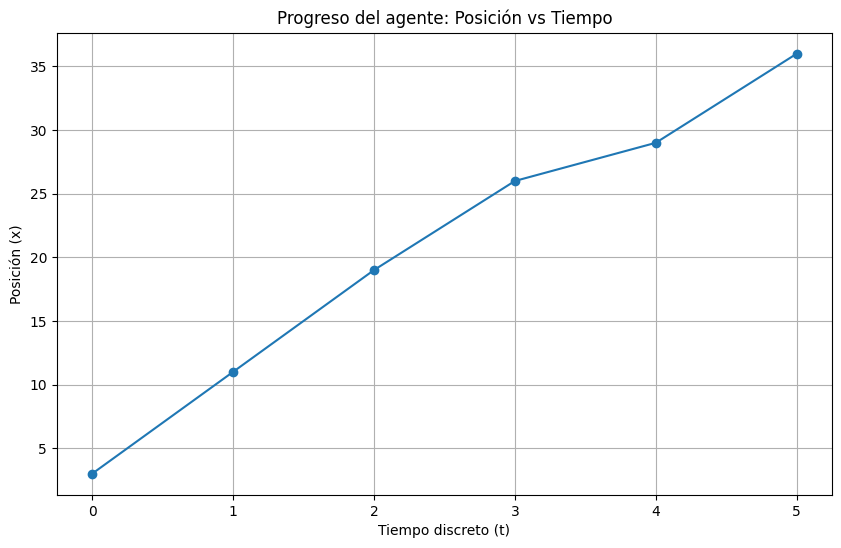

Retornos: [-6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184,

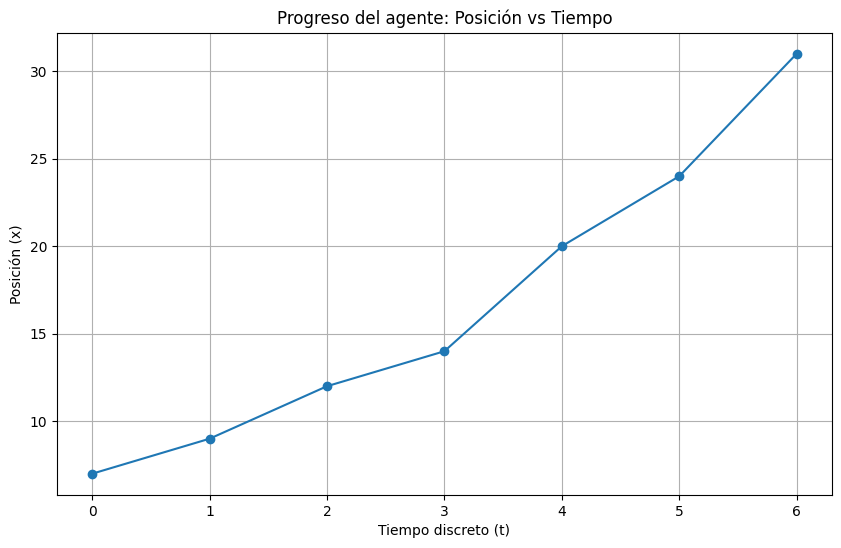

Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.1393140695039

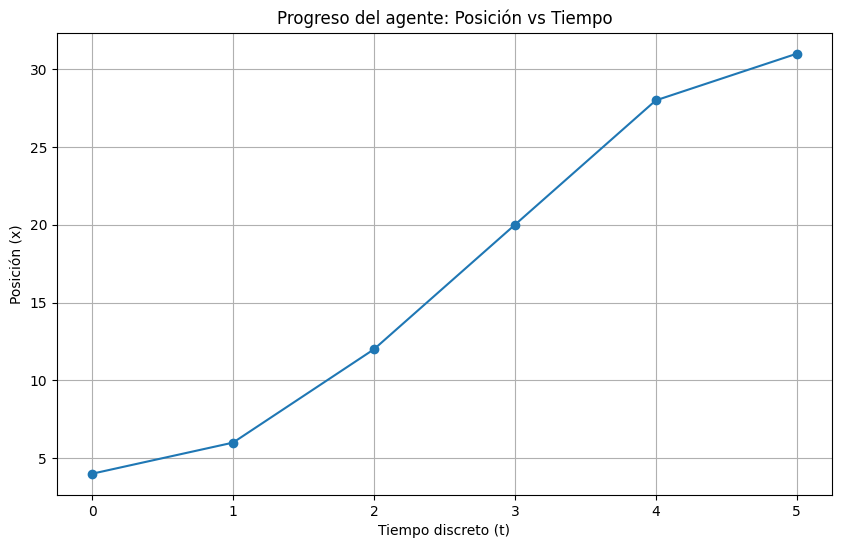

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [0.7799804672134346, 1.0833062044631037, 1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.359231999999

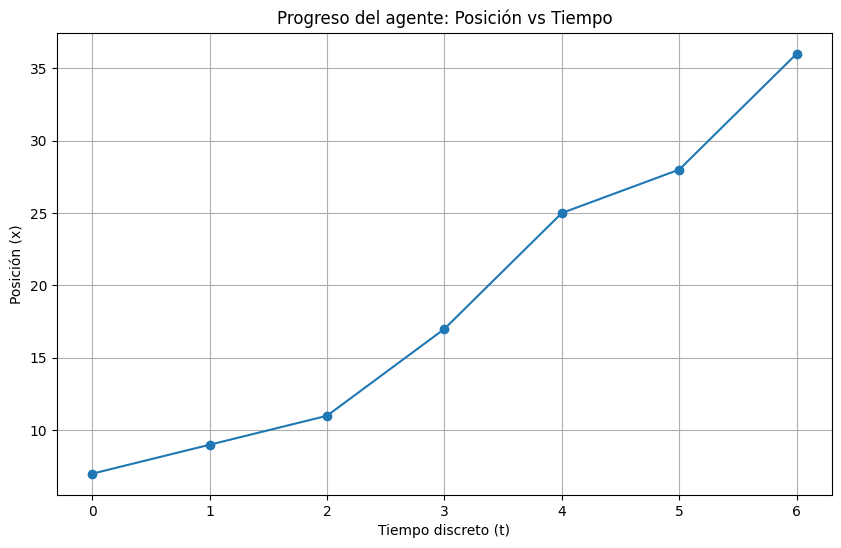

Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.41

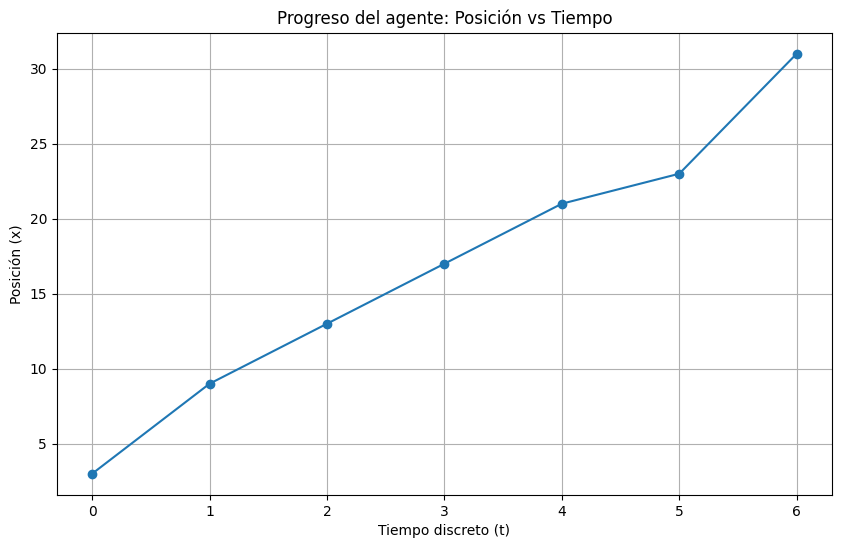

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.1555266180939772, -1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999

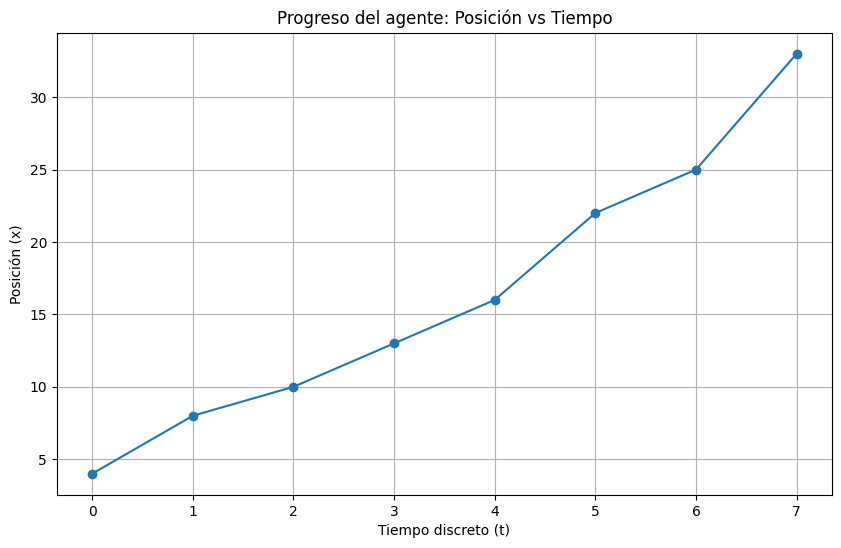

Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-3.5388002679128054, -4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -4

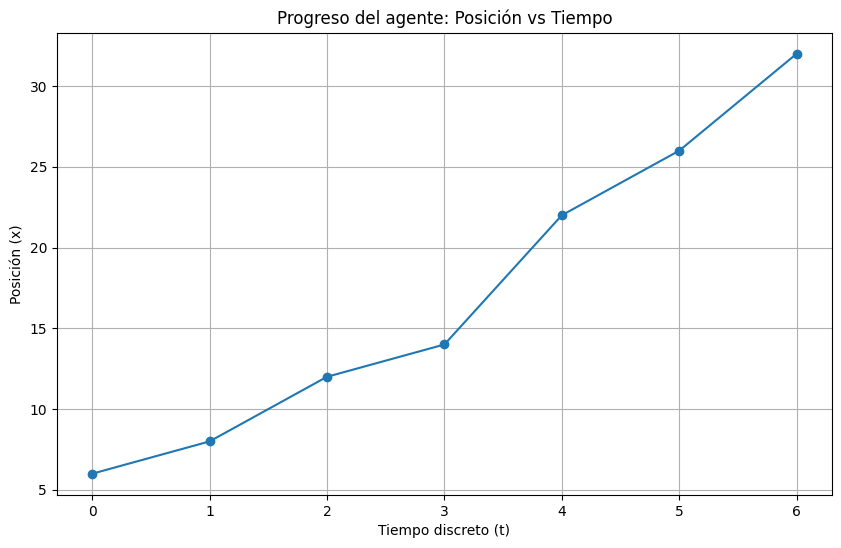

Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.139

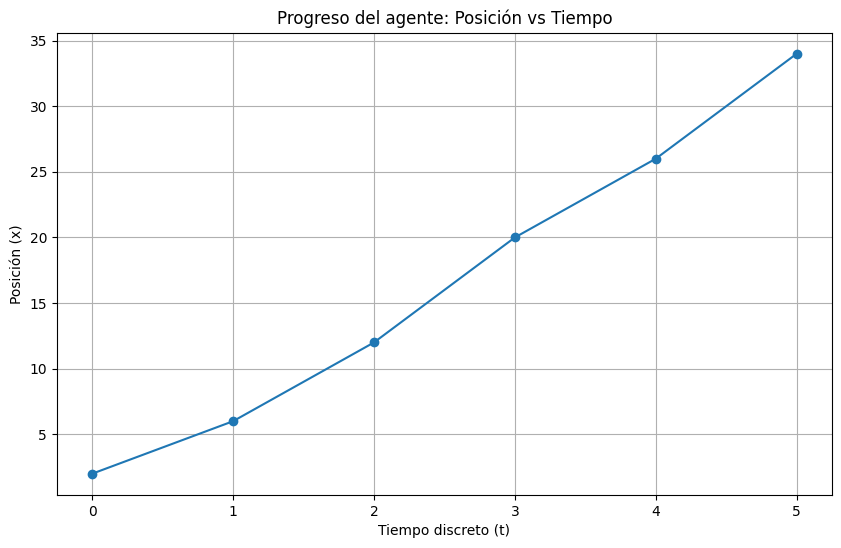

Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199

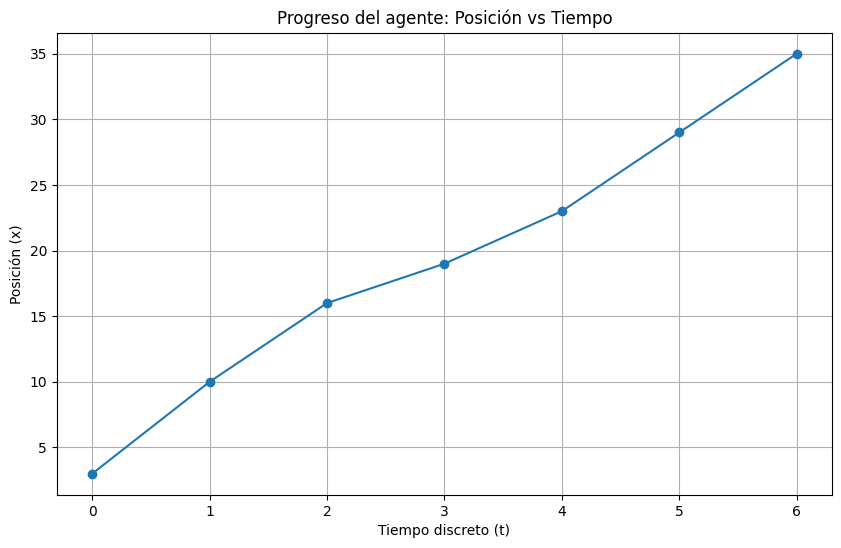

Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.373247999999999

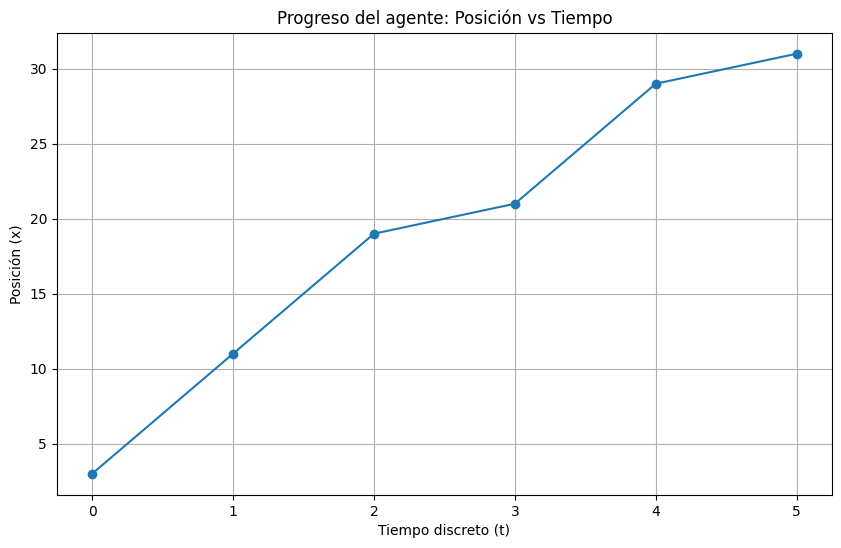

Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.2888816545234943, -0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-4.915000372101119, -6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [2.

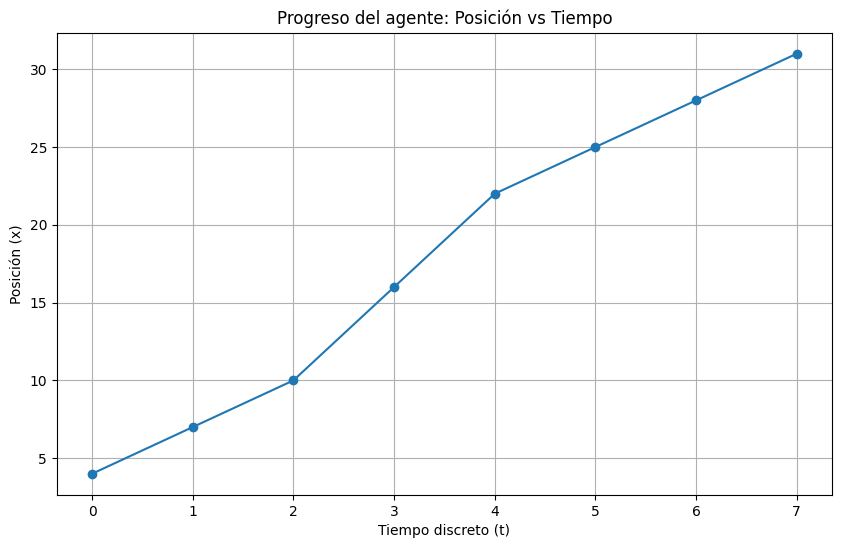

Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retorn

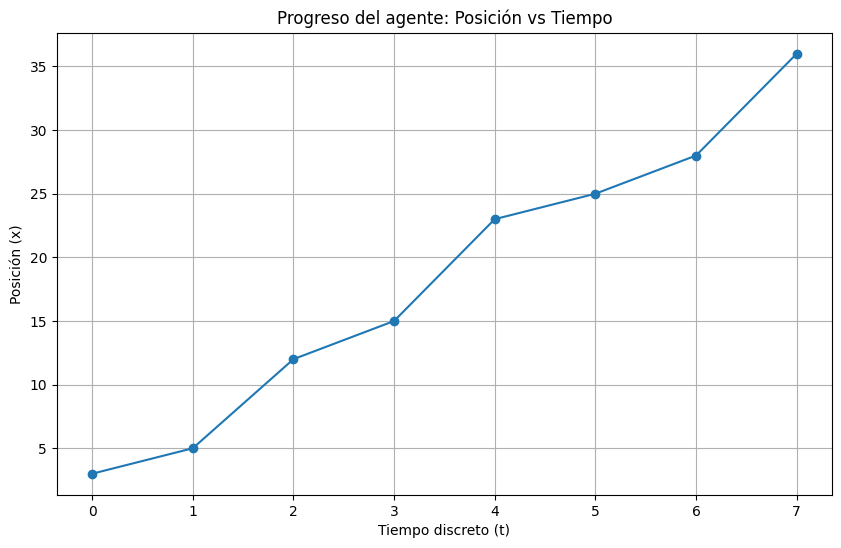

Retornos: [-6.826389405695998, -9.481096396799998, -13.168189439999997, -18.289151999999998, -25.4016, -35.28, -49.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.07222041363087357, -0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retorn

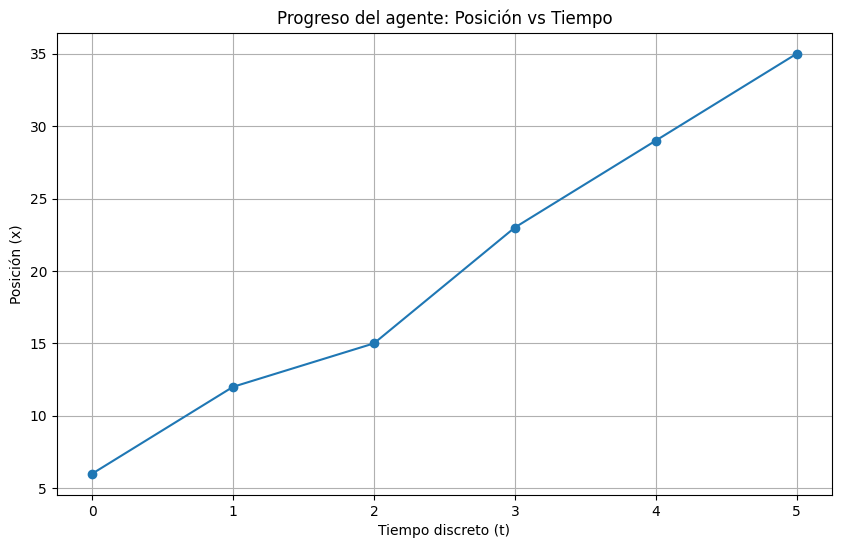

Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.4012245201715199, -0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.13931406950399997, -0.19

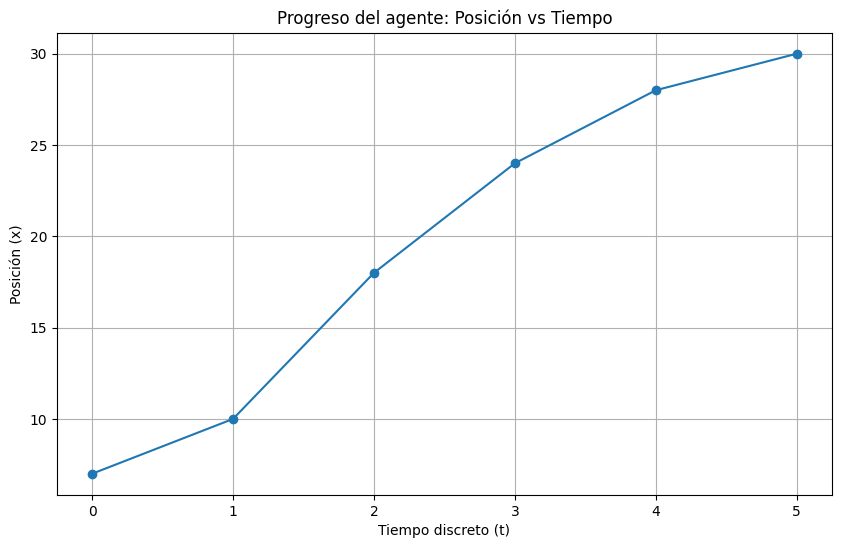

Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.9027551703859198, -1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-0.0

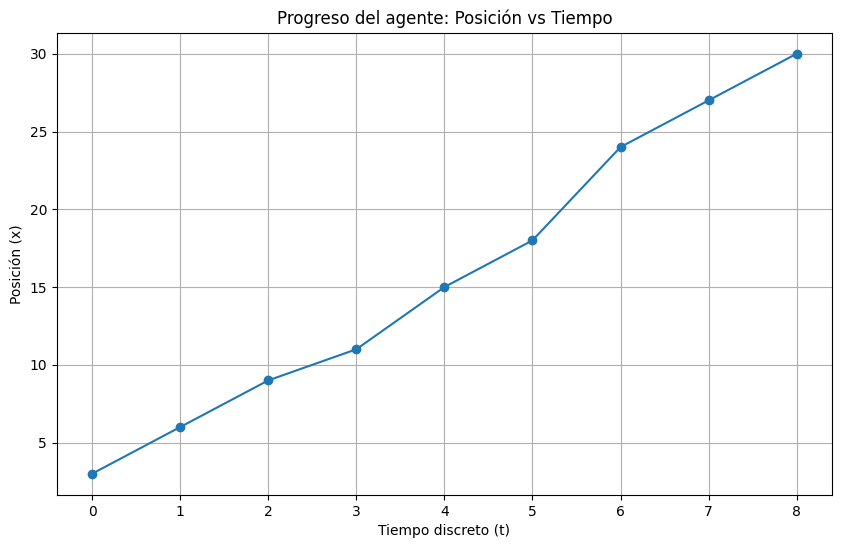

Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.10030613004287997, -0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [1.5045919506431995, 2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.79999

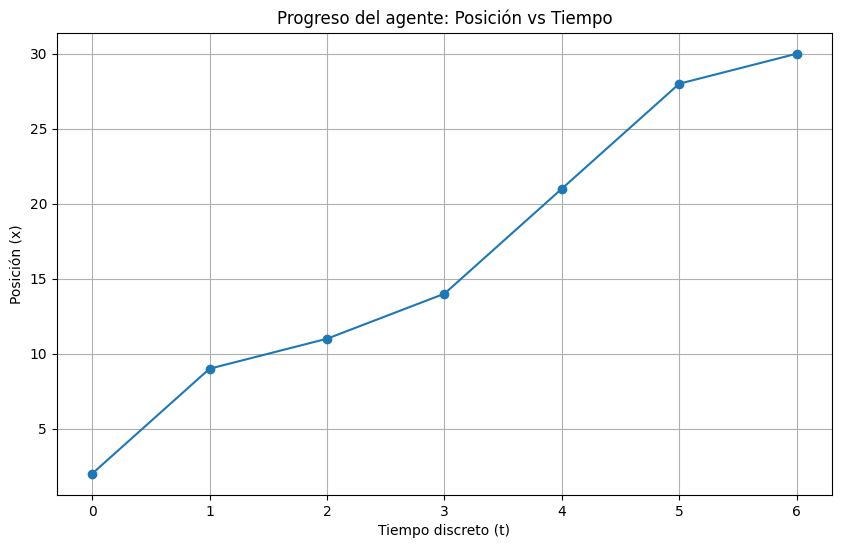

Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.0897110425599994, 2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-1.6048980806860795, -2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-3.0958682111999996, -4.

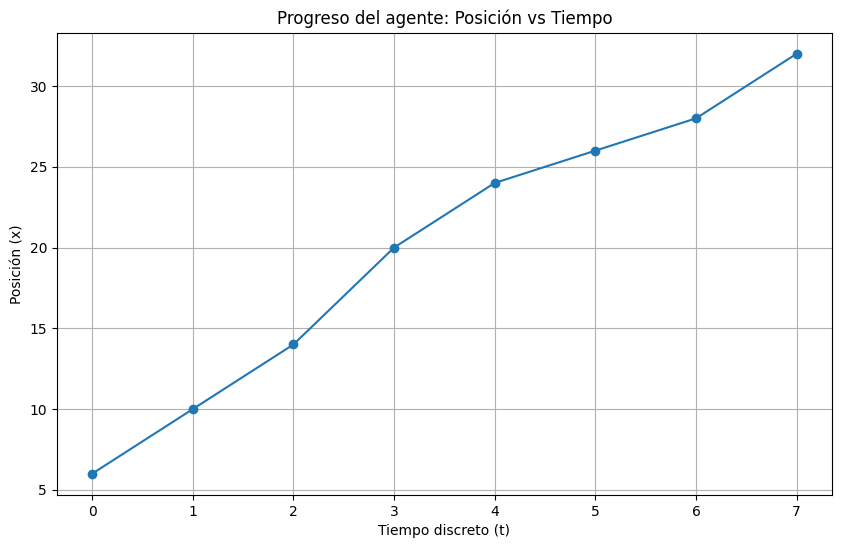

Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-0.5572562780159999, -0.7739670527999999, -1.0749542399999998, -1.4929919999999999, -2.0736, -2.88, -4.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-2.2290251120639994, -3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-5.015306502143999

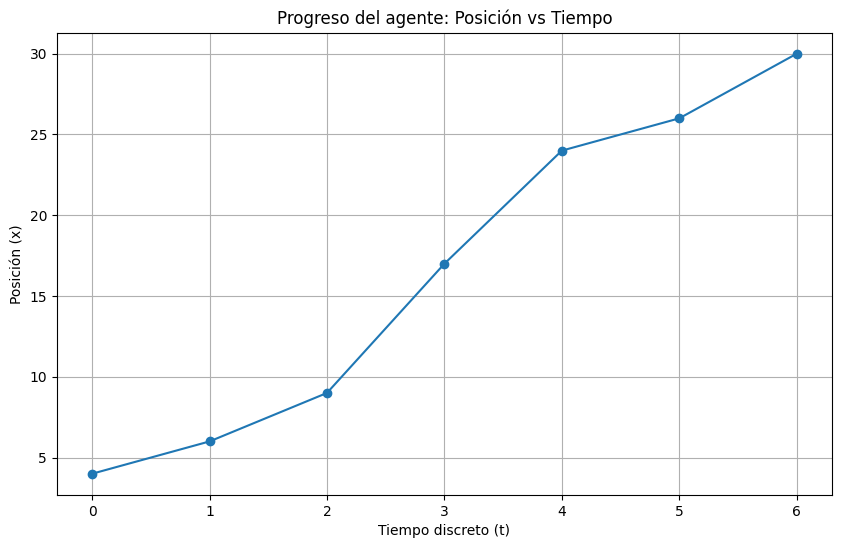

Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [2.902376447999999, 4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-3.0958682111999996, -4.299816959999999, -5.9719679999999995, -8.2944, -11.52, -16.

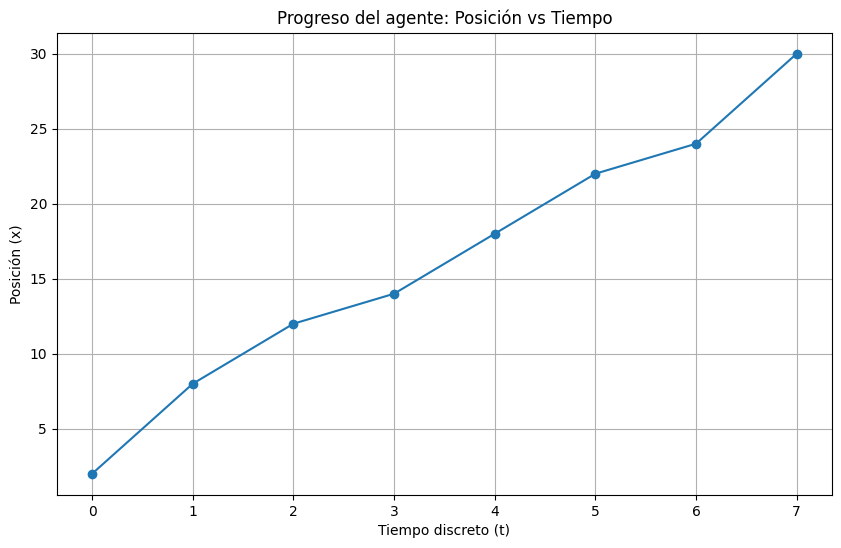

Retornos: [-3.611020681543679, -5.015306502143999, -6.965703475199999, -9.674588159999999, -13.436927999999998, -18.662399999999998, -25.919999999999998, -36.0]
Retornos: [-1.2538266255359998, -1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [-1.2999674453557244, -1.8055103407718396, -2.5076532510719995, -3.4828517375999994, -4.8372940799999995, -6.718463999999999, -9.331199999999999, -12.959999999999999, -18.0, -25.0]
Retornos: [-1.7414258687999997, -2.4186470399999997, -3.3592319999999996, -4.6655999999999995, -6.4799999999999995, -9.0]
Retornos: [4.031078399999999, 5.598719999999999, 7.775999999999999, 10.799999999999999, 15.0]
Retornos: [-0.13931406950399997, -0.19349176319999997, -0.26873855999999996, -0.37324799999999997, -0.5184, -0.72, -1.0]
Retornos: [-0.2888816545234943, -0.40122452017

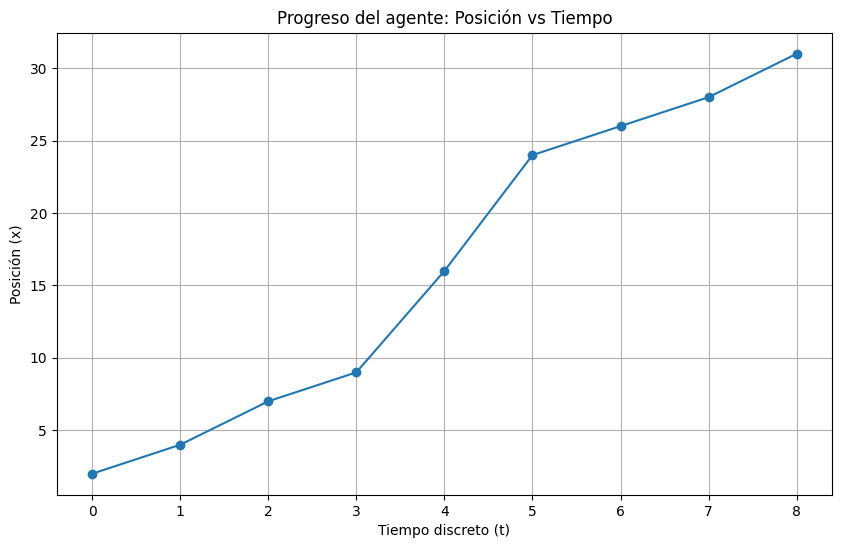

In [90]:
# Entrenamiento del agente con penalización y detención en negativos
estado_inicial, objetivo = inicializar_entorno()
theta = np.array([-0.2, 0.3])  # Parámetros iniciales
alpha = 0.03  # Tasa de aprendizaje
gamma = 0.72  # Factor de descuento

for episodio in range(1000):  # Entrenar por 1000 episodios
    estado = estado_inicial
    historia = []
    recompensas = []

    for t in range(10):  # Limitar a 10 pasos por episodio
        acciones, probabilidades = politica(theta, estado)
        accion = seleccionar_accion(acciones, probabilidades)
        nuevo_estado = transicion_estado(estado, accion)
        recompensa = calcular_recompensa(nuevo_estado, objetivo)

        historia.append(nuevo_estado)
        recompensas.append(recompensa)

        if nuevo_estado > 30:  # Detener si el estado excede
            recompensa -= (nuevo_estado - 30) * 15  # Penalización adicional si se pasa
            #historia.append(nuevo_estado)  # Registrar el estado final
            #recompensas.append(recompensa)  # Registrar la penalización
            break

        if nuevo_estado == objetivo:  # Detener si se alcanza el objetivo
            break

        estado = nuevo_estado

    # Calcular retornos y actualizar theta
    retornos = calcular_retorno(recompensas, gamma)
    print(f"Retornos: {retornos}")
    theta = actualizar_theta(theta, historia, acciones, retornos, alpha)

    if episodio % 10 == 0:
        print(f"Episodio {episodio}: Parámetros theta = {theta}")
        mostrar(historia)

# Visualizar último episodio
mostrar(historia)

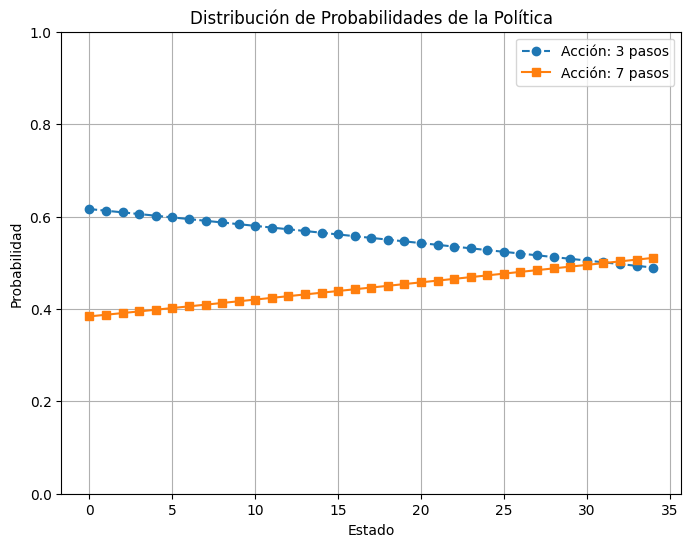

In [91]:
visualizar_politica(theta)

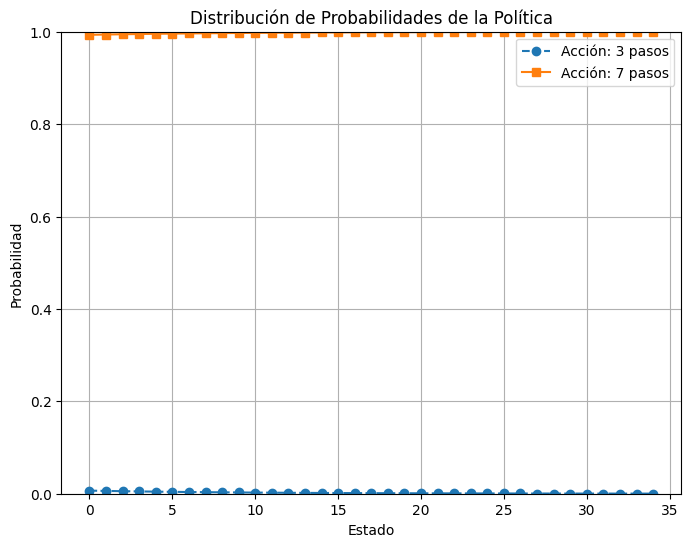

In [76]:
visualizar_politica(np.array([-5, 3]))

In [19]:
politica(theta, 3)

Probabilidades: [0.63082096 0.36917904]
Probabilidades clip: [0.63082096 0.36917904]


([3, 7], array([0.63082096, 0.36917904]))

In [20]:
theta = np.array([-0.2, 0.7])

In [21]:
politica(theta, 9)

Probabilidades: [0.39891212 0.60108788]
Probabilidades clip: [0.39891212 0.60108788]


([3, 7], array([0.39891212, 0.60108788]))

Probabilidades: [0.450166 0.549834]
Probabilidades clip: [0.450166 0.549834]
Probabilidades: [0.44439759 0.55560241]
Probabilidades clip: [0.44439759 0.55560241]
Probabilidades: [0.43864412 0.56135588]
Probabilidades clip: [0.43864412 0.56135588]
Probabilidades: [0.4329071 0.5670929]
Probabilidades clip: [0.4329071 0.5670929]
Probabilidades: [0.42718801 0.57281199]
Probabilidades clip: [0.42718801 0.57281199]
Probabilidades: [0.42148832 0.57851168]
Probabilidades clip: [0.42148832 0.57851168]
Probabilidades: [0.41580948 0.58419052]
Probabilidades clip: [0.41580948 0.58419052]
Probabilidades: [0.4101529 0.5898471]
Probabilidades clip: [0.4101529 0.5898471]
Probabilidades: [0.40451999 0.59548001]
Probabilidades clip: [0.40451999 0.59548001]
Probabilidades: [0.39891212 0.60108788]
Probabilidades clip: [0.39891212 0.60108788]
Probabilidades: [0.39333064 0.60666936]
Probabilidades clip: [0.39333064 0.60666936]
Probabilidades: [0.38777688 0.61222312]
Probabilidades clip: [0.38777688 0.612223

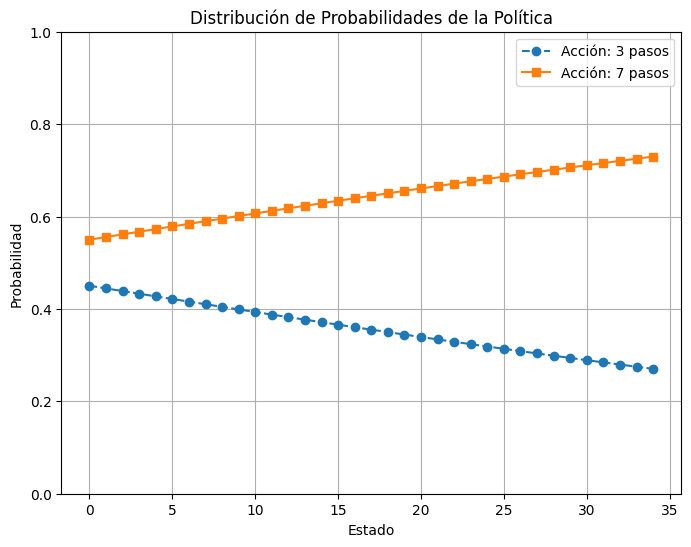

In [22]:
visualizar_politica(theta)